In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/datasets/car_train_data/test.csv')
train_data = pd.read_csv('/content/drive/MyDrive/datasets/car_train_data/train.csv')

In [ ]:
train_data.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500

In [ ]:
test_data.head()

id brand                 model  model_year  milage fuel_type  \
0  188533  Land        Rover LR2 Base        2015   98000  Gasoline   
1  188534  Land     Rover Defender SE        2020    9142    Hybrid   
2  188535  Ford    Expedition Limited        2022   28121  Gasoline   
3  188536  Audi         A6 2.0T Sport        2016   61258  Gasoline   
4  188537  Audi  A6 2.0T Premium Plus        2018   59000  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   
3                                     2.0 Liter TFSI           Automatic   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 A/T   

           ext_col int_col       accident clean_title  
0            White   Beige  None reported         Yes  
1           Silver   Black  None reported         Yes  
2            White   Ebony  None reported         NaN  
3  Silician Yellow   Black  None reported         NaN  
4             Gray   Black  None reported         Yes

In [ ]:
train_data.shape

(188533, 13)

In [ ]:
test_data.shape

(125690, 12)

In [ ]:
train_data.describe(include='all')

id   brand      model     model_year         milage  \
count   188533.000000  188533     188533  188533.000000  188533.000000   
unique            NaN      57       1897            NaN            NaN   
top               NaN    Ford  F-150 XLT            NaN            NaN   
freq              NaN   23088       2945            NaN            NaN   
mean     94266.000000     NaN        NaN    2015.829998   65705.295174   
std      54424.933488     NaN        NaN       5.660967   49798.158076   
min          0.000000     NaN        NaN    1974.000000     100.000000   
25%      47133.000000     NaN        NaN    2013.000000   24115.000000   
50%      94266.000000     NaN        NaN    2017.000000   57785.000000   
75%     141399.000000     NaN        NaN    2020.000000   95400.000000   
max     188532.000000     NaN        NaN    2024.000000  405000.000000   

       fuel_type                                        engine transmission  \
count     183450                                        188533       188533   
unique         7                                          1117           52   
top     Gasoline  355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel          A/T   
freq      165940                                          3462        49904   
mean         NaN                                           NaN          NaN   
std          NaN                                           NaN          NaN   
min          NaN                                           NaN          NaN   
25%          NaN                                           NaN          NaN   
50%          NaN                                           NaN          NaN   
75%          NaN                                           NaN          NaN   
max          NaN                                           NaN          NaN   

       ext_col int_col       accident clean_title         price  
count   188533  188533         186081      167114  1.885330e+05  
unique     319     156              2           1           NaN  
top      Black   Black  None reported         Yes           NaN  
freq     48658  107674         144514      167114           NaN  
mean       NaN     NaN            NaN         NaN  4.387802e+04  
std        NaN     NaN            NaN         NaN  7.881952e+04  
min        NaN     NaN            NaN         NaN  2.000000e+03  
25%        NaN     NaN            NaN         NaN  1.700000e+04  
50%        NaN     NaN            NaN         NaN  3.082500e+04  
75%        NaN     NaN            NaN         NaN  4.990000e+04  
max        NaN     NaN            NaN         NaN  2.954083e+06

EDA

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
train_data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [ ]:
test_data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [ ]:
train_data.isnull().sum()/len(train_data)*100

id               0.000000
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.696080
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.300568
clean_title     11.360876
price            0.000000
dtype: float64

In [ ]:
test_data.isnull().sum()/len(train_data)*100

id              0.000000
brand           0.000000
model           0.000000
model_year      0.000000
milage          0.000000
fuel_type       1.794381
engine          0.000000
transmission    0.000000
ext_col         0.000000
int_col         0.000000
accident        0.865631
clean_title     7.552524
dtype: float64

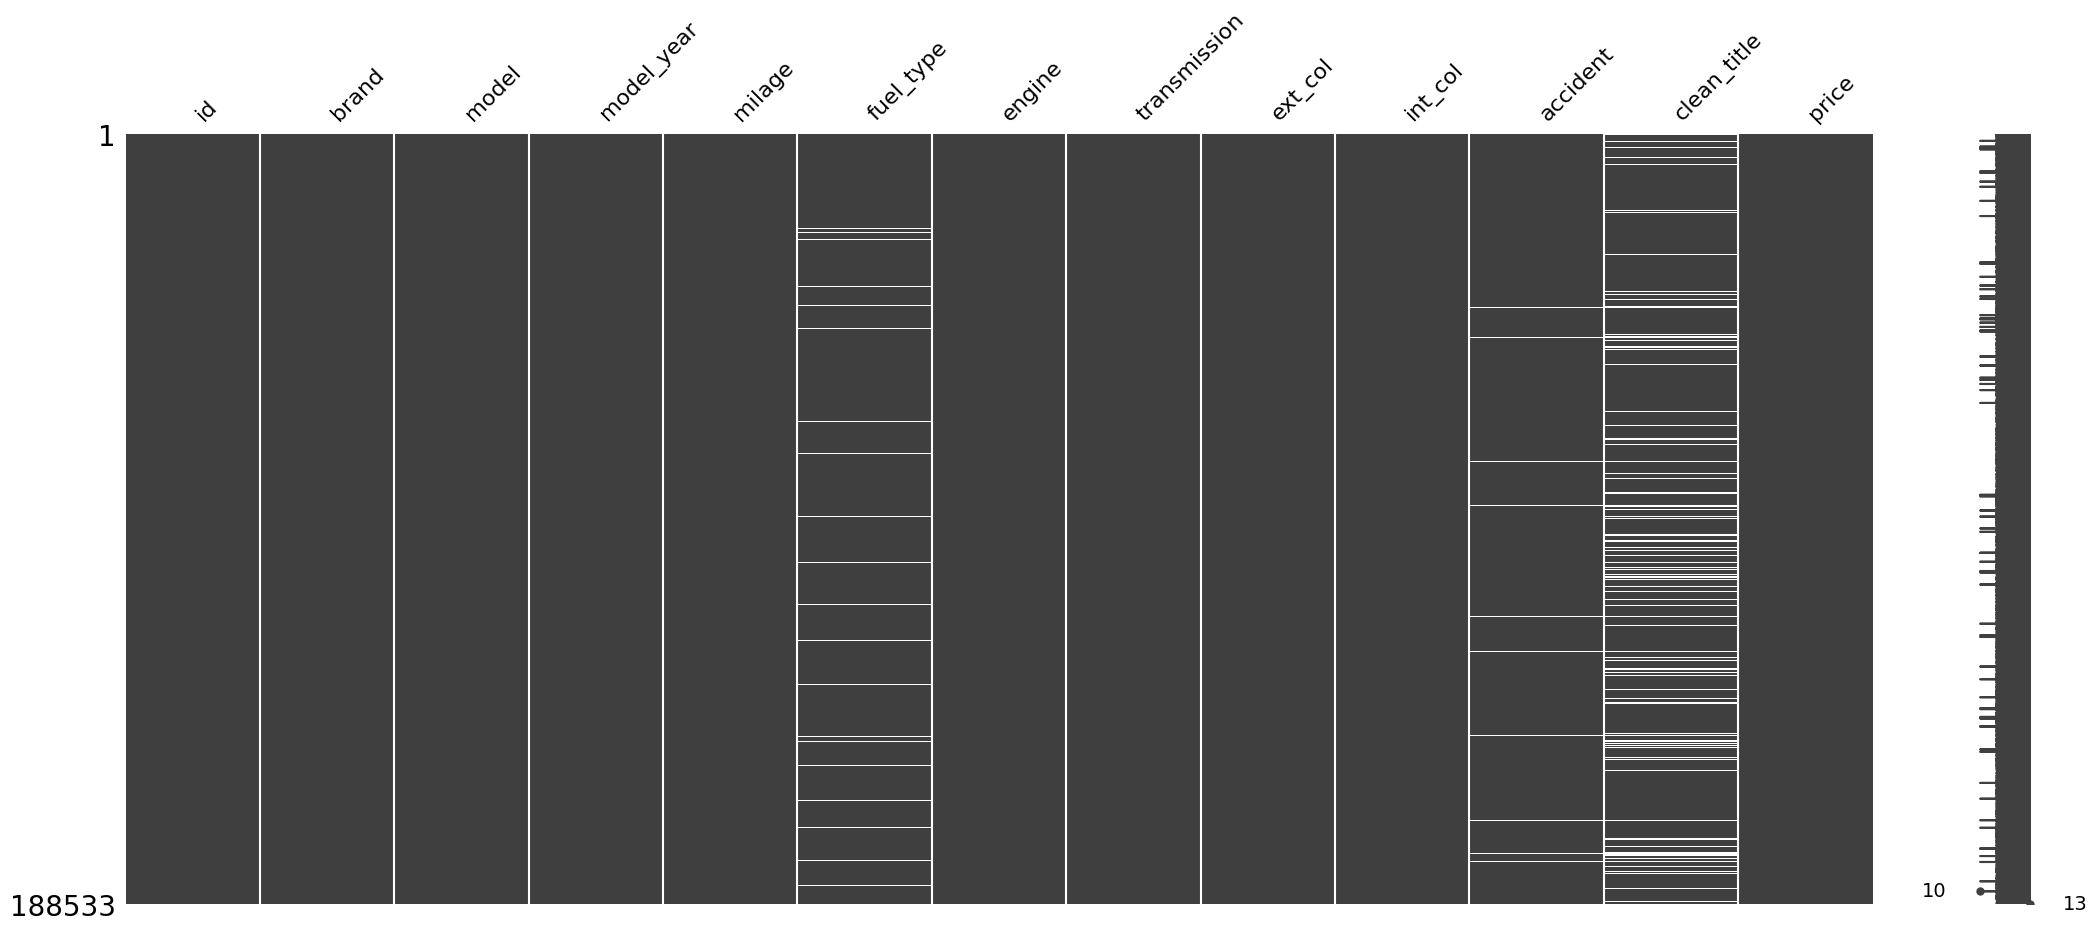

In [ ]:
import missingno as msn
msn.matrix(train_data)
plt.show()

In [ ]:
# train_data['clean_title'].fillna("No", inplace=True)
# test_data['clean_title'].fillna("No", inplace=True)

In [ ]:
train_data['fuel_type'].fillna(train_data['fuel_type'].mode()[0], inplace=True)
train_data['accident'].fillna(train_data['accident'].mode()[0], inplace=True)
train_data['clean_title'].fillna("No", inplace=True)

test_data['fuel_type'].fillna(test_data['fuel_type'].mode()[0], inplace=True)
test_data['accident'].fillna(test_data['accident'].mode()[0], inplace=True)
test_data['clean_title'].fillna("No", inplace=True)

In [ ]:
# train_data.dropna(inplace=True)
# test_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()/len(train_data)*100

id              0.0
brand           0.0
model           0.0
model_year      0.0
milage          0.0
fuel_type       0.0
engine          0.0
transmission    0.0
ext_col         0.0
int_col         0.0
accident        0.0
clean_title     0.0
price           0.0
dtype: float64

In [ ]:
test_data.isnull().sum()/len(test_data)*100


id              0.0
brand           0.0
model           0.0
model_year      0.0
milage          0.0
fuel_type       0.0
engine          0.0
transmission    0.0
ext_col         0.0
int_col         0.0
accident        0.0
clean_title     0.0
dtype: float64

In [ ]:
# Identify numerical and categorical columns
train_numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_categorical_cols = train_data.select_dtypes(include=['object']).columns

print(train_numeric_cols)
print(train_categorical_cols)

Index(['id', 'model_year', 'milage', 'price'], dtype='object')
Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')


In [ ]:
for c in train_categorical_cols:
    print(c)
    num_unique = train_data[c].nunique()
    print("Number of unique values:", num_unique)

brand
Number of unique values: 57
model
Number of unique values: 1897
fuel_type
Number of unique values: 7
engine
Number of unique values: 1117
transmission
Number of unique values: 52
ext_col
Number of unique values: 319
int_col
Number of unique values: 156
accident
Number of unique values: 2
clean_title
Number of unique values: 2


In [ ]:
train_data[train_numeric_cols].head()

id  model_year  milage  price
0   0        2007  213000   4200
1   1        2002  143250   4999
2   2        2002  136731  13900
3   3        2017   19500  45000
4   4        2021    7388  97500

In [ ]:
train_data[train_categorical_cols].head()

brand              model      fuel_type  \
0           MINI      Cooper S Base       Gasoline   
1        Lincoln              LS V8       Gasoline   
2      Chevrolet  Silverado 2500 LT  E85 Flex Fuel   
3        Genesis   G90 5.0 Ultimate       Gasoline   
4  Mercedes-Benz        Metris Base       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  
0                           None reported         Yes  
1  At least 1 accident or damage reported         Yes  
2                           None reported         Yes  
3                           None reported         Yes  
4                           None reported         Yes

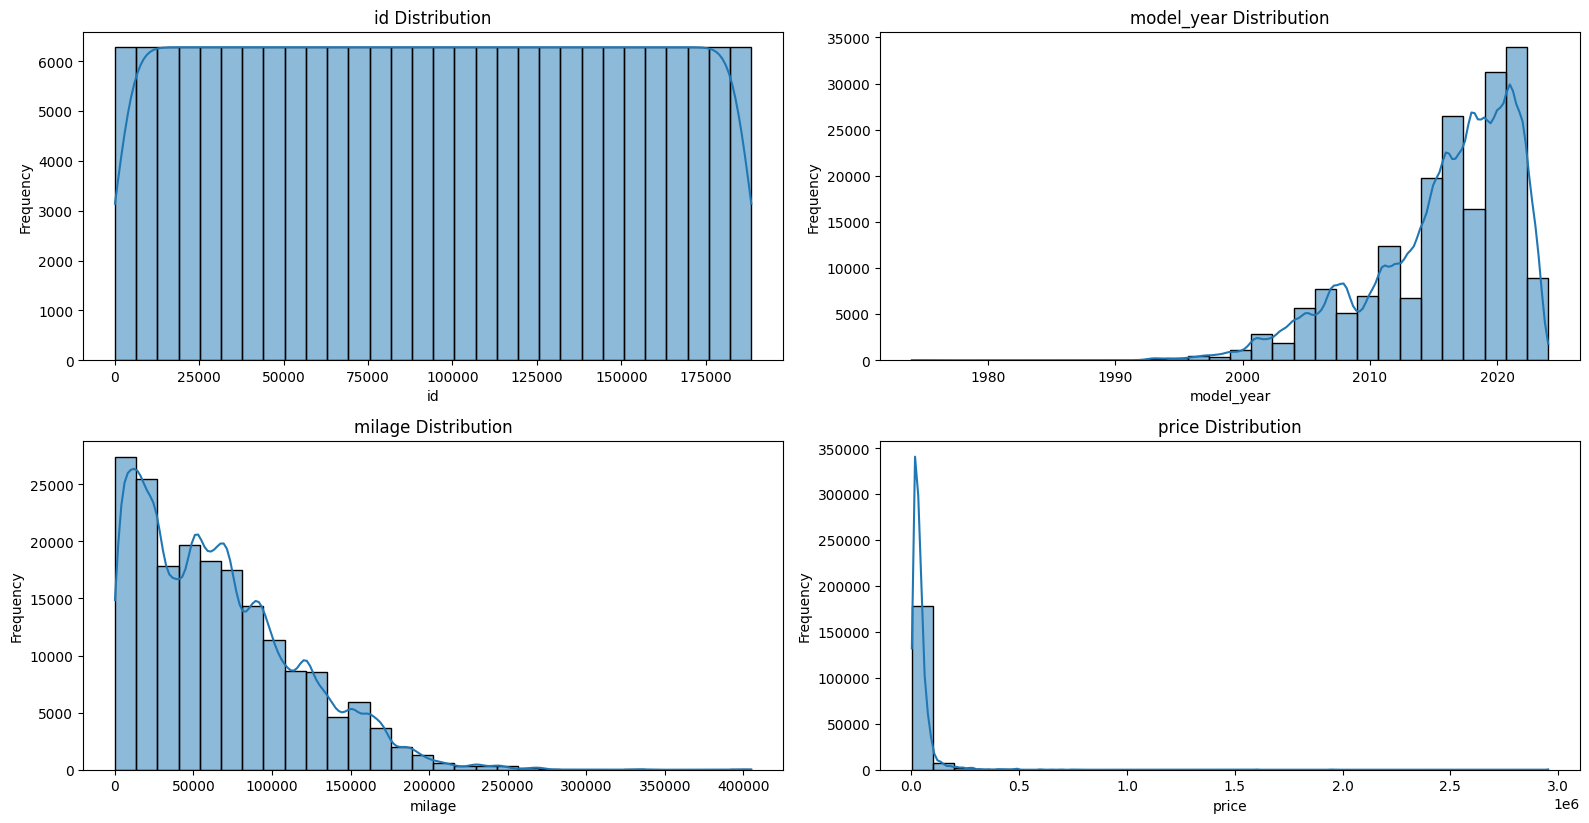

In [ ]:
# Plotting the histograms with KDE for each numerical feature

plt.figure(figsize=(16, 12))
for i, col in enumerate(train_numeric_cols):
    plt.subplot(len(train_numeric_cols) // 2 + 1, 2, i + 1)
    sns.histplot(train_data[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

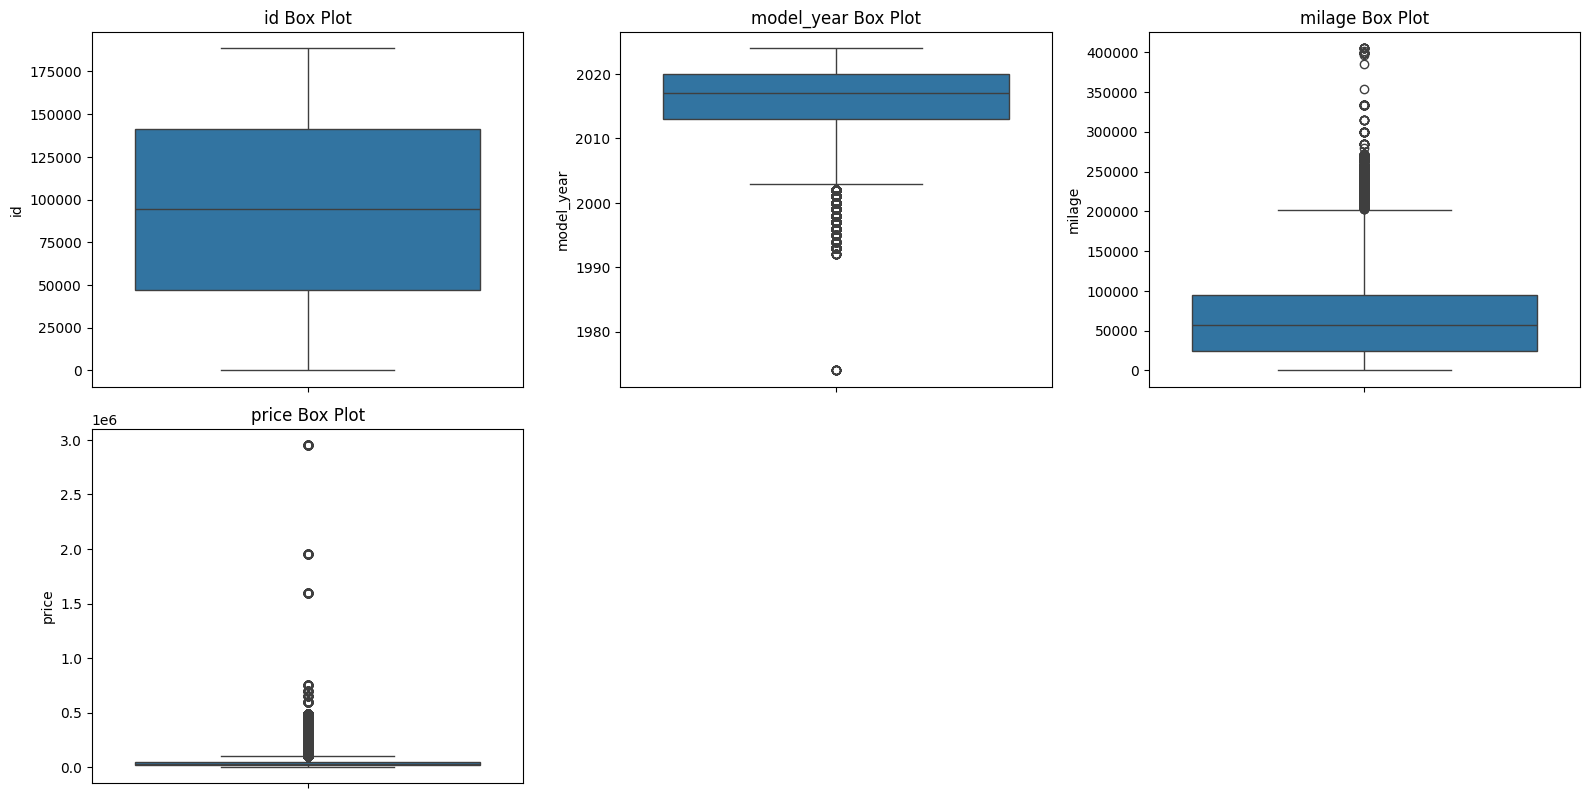

In [ ]:
# check outlier in numeric data
# box plot
plt.figure(figsize=(16, 12))
for i, col in enumerate(train_numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=train_data[col])
    plt.title(f'{col} Box Plot')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

<Axes: >

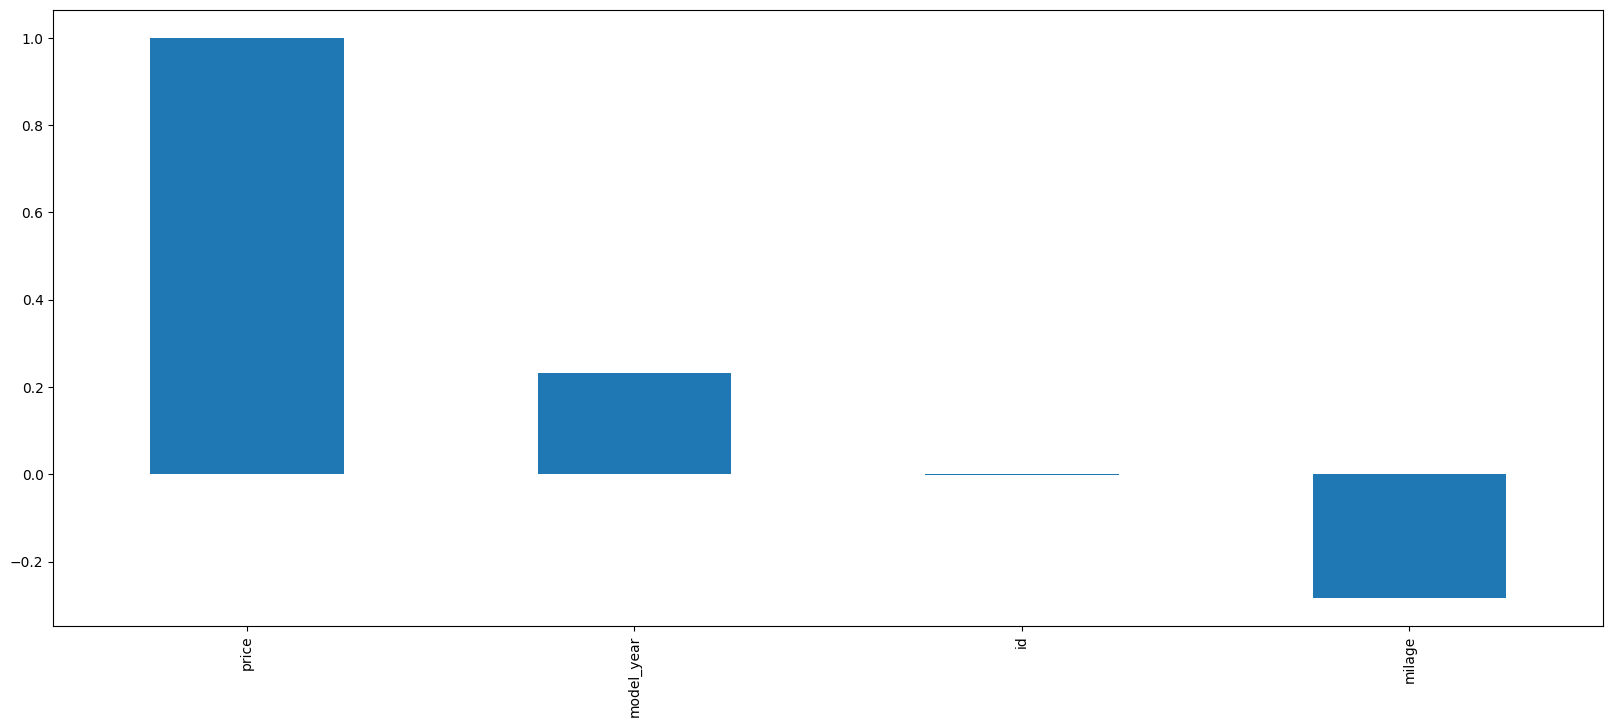

In [ ]:
plt.figure(figsize=(20,8))
train_data[train_numeric_cols].corr()['price'].sort_values(ascending=False).plot(kind='bar')

In [ ]:
train_data['milage_log'] = np.log1p(train_data['milage'])
train_data['price_log'] = np.log1p(train_data['price'])


In [ ]:
test_data['milage_log'] = np.log1p(test_data['milage'])


<Axes: xlabel='price_log', ylabel='Count'>

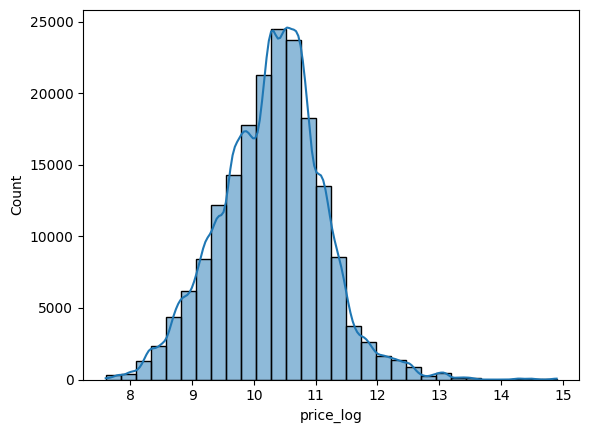

In [ ]:
sns.histplot(train_data['price_log'], kde=True, bins=30)


<Axes: xlabel='milage_log', ylabel='Count'>

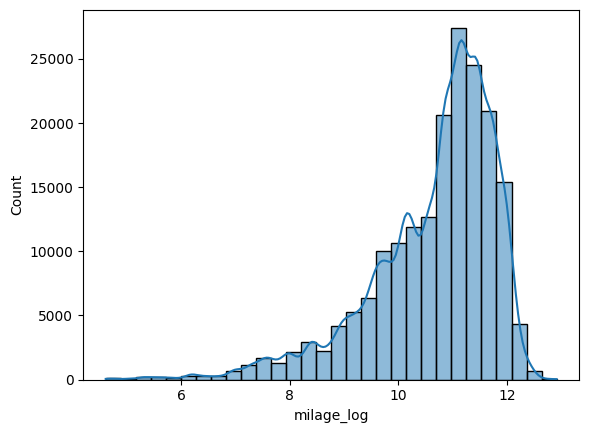

In [ ]:
sns.histplot(train_data['milage_log'], kde=True, bins=30)


<Axes: ylabel='milage_log'>

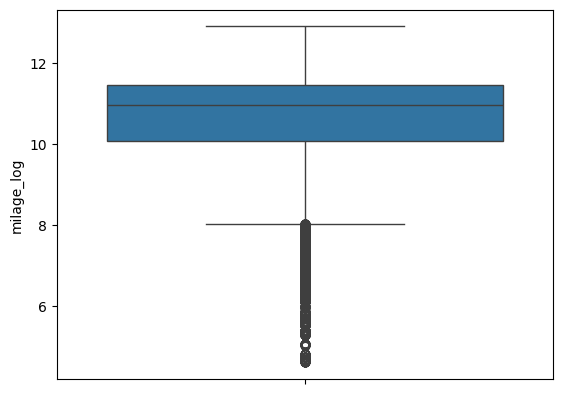

In [ ]:
sns.boxplot(y=train_data['milage_log'])


<Axes: ylabel='price_log'>

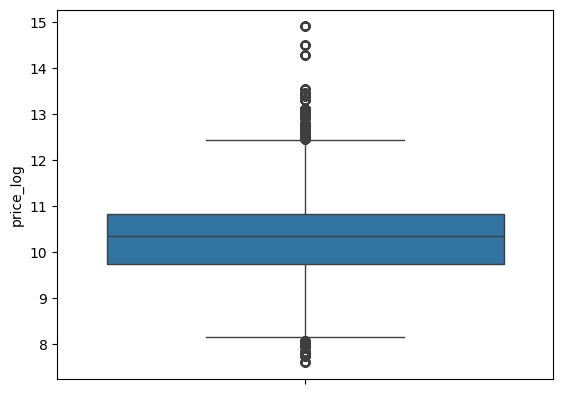

In [ ]:
sns.boxplot(y=train_data['price_log'])


In [ ]:
def cap_outliers(df, features):
    df_capped = df.copy()
    for column in features:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)

    return df_capped


In [ ]:
train_data = cap_outliers(train_data, ['milage', 'price'])

<Axes: xlabel='milage', ylabel='Count'>

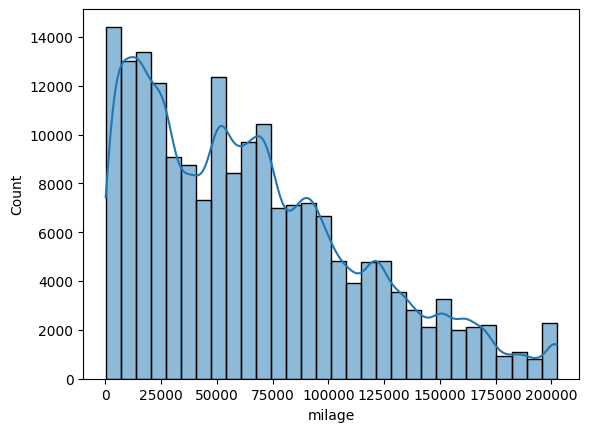

In [ ]:
sns.histplot(train_data['milage'], kde=True, bins=30)


<Axes: xlabel='price', ylabel='Count'>

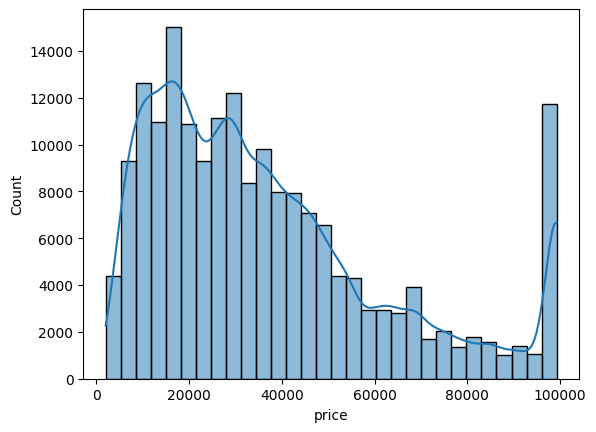

In [ ]:
sns.histplot(train_data['price'], kde=True, bins=30)


<Axes: ylabel='milage'>

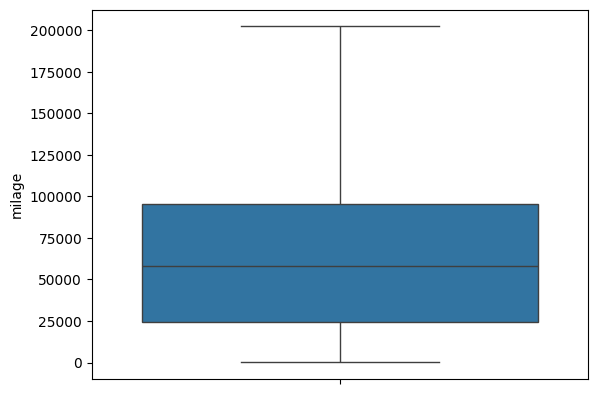

In [ ]:
sns.boxplot(y=train_data['milage'])


<Axes: ylabel='price'>

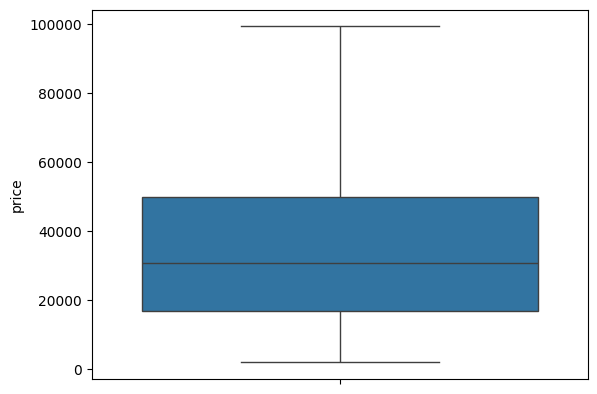

In [ ]:
sns.boxplot(y=train_data['price'])


In [ ]:
train_data = cap_outliers(train_data, ['milage_log', 'price_log'])

<Axes: xlabel='milage_log', ylabel='Count'>

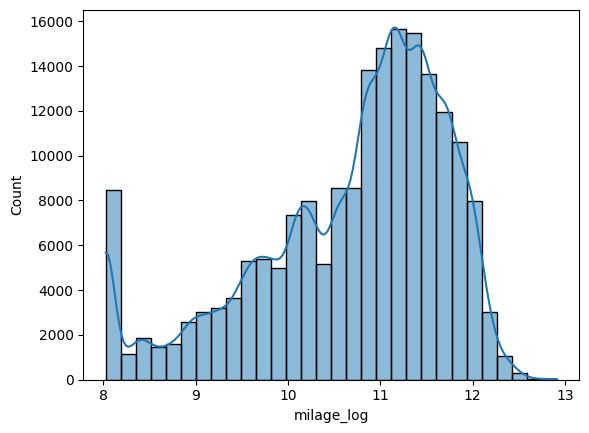

In [ ]:
sns.histplot(train_data['milage_log'], kde=True, bins=30)


<Axes: xlabel='price_log', ylabel='Count'>

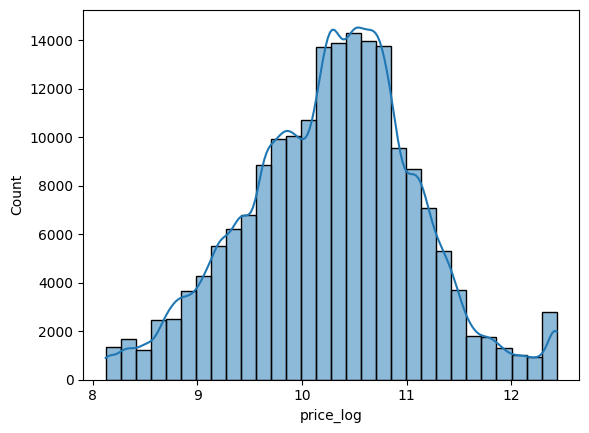

In [ ]:
sns.histplot(train_data['price_log'], kde=True, bins=30)


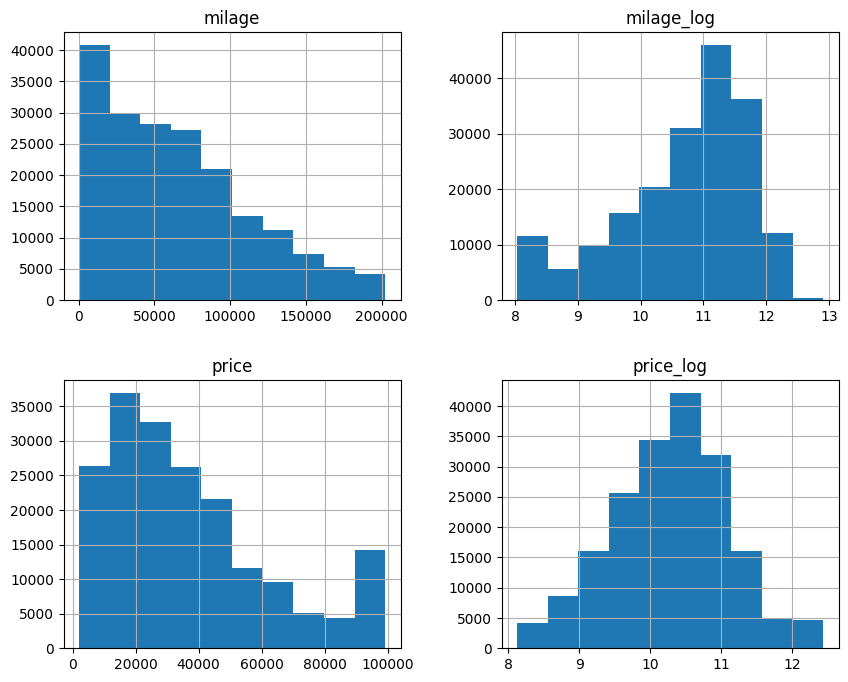

In [ ]:
train_data[['milage', 'milage_log', 'price', 'price_log']].hist(figsize=(10, 8))
plt.show()

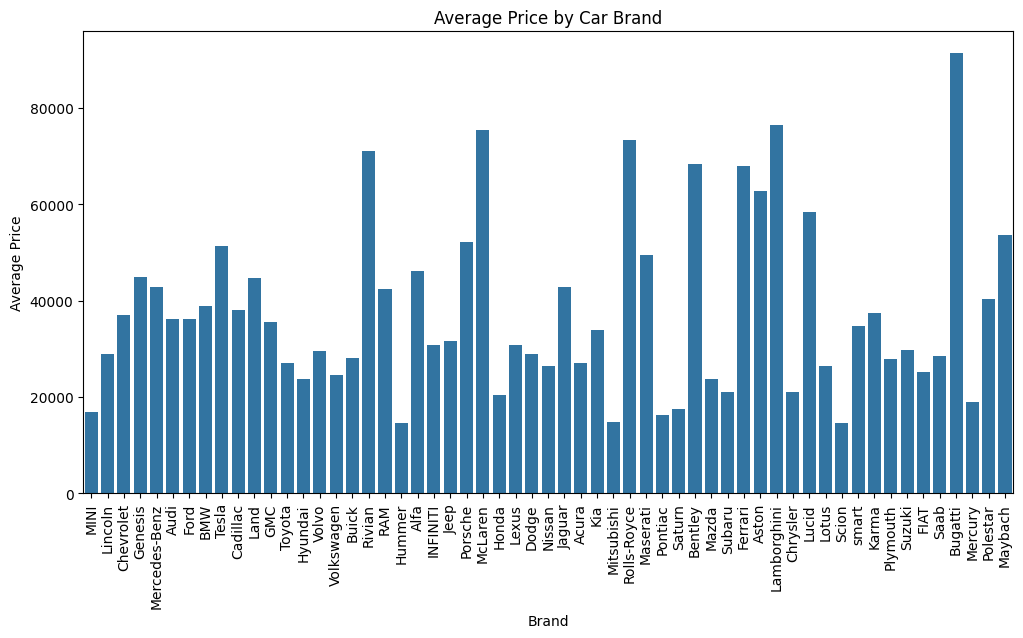

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=train_data, errorbar=None)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

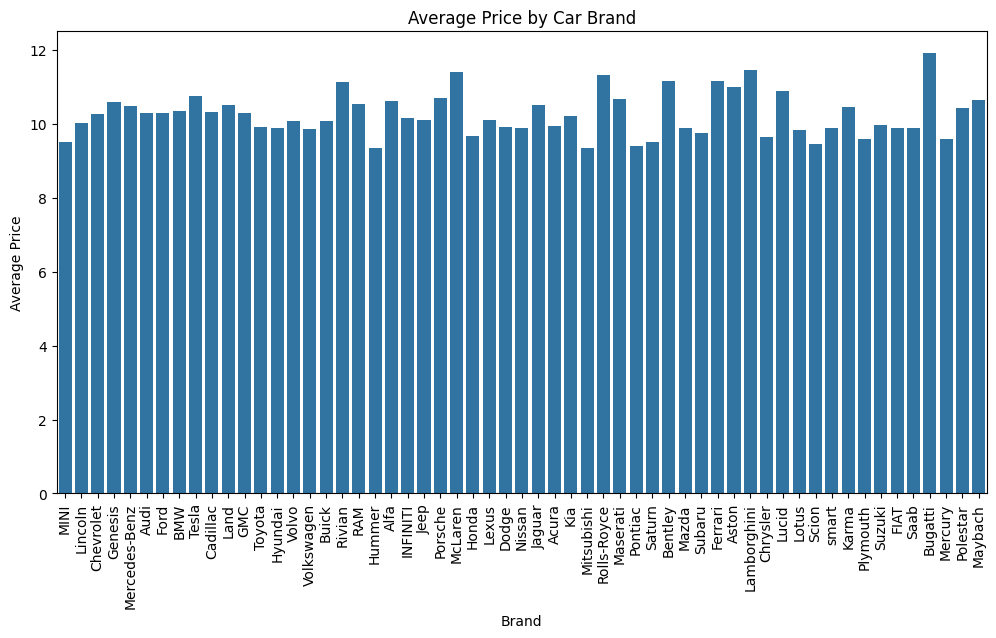

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price_log', data=train_data, errorbar=None)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_data.head()

id          brand              model  model_year    milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  202327.5       Gasoline   
1   1        Lincoln              LS V8        2002  143250.0       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731.0  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500.0       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388.0       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  milage_log  \
0                           None reported         Yes   4200   12.269052   
1  At least 1 accident or damage reported         Yes   4999   11.872354   
2                           None reported         Yes  13900   11.825778   
3                           None reported         Yes  45000    9.878221   
4                           None reported         Yes  97500    8.907748   

   price_log  
0   8.343078  
1   8.517193  
2   9.539716  
3  10.714440  
4  11.487618

Extract Engine columns

In [ ]:
train_data['horsepower'] = train_data['engine'].str.extract(r'(\d+\.\d+)(?=HP)').astype(float)
train_data['engine_size'] = train_data['engine'].str.extract(r'(\d+\.\d+)(?=L)').astype(float)
train_data['cylinders'] = train_data['engine'].str.extract(r'(\d+)\s(Cylinder|V\d|Straight)')[0].astype(float)

test_data['horsepower'] = test_data['engine'].str.extract(r'(\d+\.\d+)(?=HP)').astype(float)
test_data['engine_size'] = test_data['engine'].str.extract(r'(\d+\.\d+)(?=L)').astype(float)
test_data['cylinders'] = test_data['engine'].str.extract(r'(\d+)\s(Cylinder|V\d|Straight)')[0].astype(float)



In [ ]:
train_data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title         0
price               0
milage_log          0
price_log           0
horsepower      33259
engine_size     14214
cylinders       37855
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

train_data[['horsepower', 'engine_size', 'cylinders']] = imputer.fit_transform(train_data[['horsepower', 'engine_size', 'cylinders']])
test_data[['horsepower', 'engine_size', 'cylinders']] = imputer.transform(test_data[['horsepower', 'engine_size', 'cylinders']])


In [ ]:
train_data[train_categorical_cols]

brand                     model      fuel_type  \
0                MINI             Cooper S Base       Gasoline   
1             Lincoln                     LS V8       Gasoline   
2           Chevrolet         Silverado 2500 LT  E85 Flex Fuel   
3             Genesis          G90 5.0 Ultimate       Gasoline   
4       Mercedes-Benz               Metris Base       Gasoline   
...               ...                       ...            ...   
188528       Cadillac     Escalade ESV Platinum       Gasoline   
188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC       Gasoline   
188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC       Gasoline   
188531           Audi          S5 3.0T Prestige       Gasoline   
188532        Porsche                Macan Base       Gasoline   

                                                   engine  \
0            172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1            252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2       320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3            420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4            208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
...                                                   ...   
188528       420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel   
188529      385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
188530       469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel   
188531                                               3.0L   
188532       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                          transmission                    ext_col int_col  \
0                                  A/T                     Yellow    Gray   
1                                  A/T                     Silver   Beige   
2                                  A/T                       Blue    Gray   
3       Transmission w/Dual Shift Mode                      Black   Black   
4                          7-Speed A/T                      Black   Beige   
...                                ...                        ...     ...   
188528  Transmission w/Dual Shift Mode                      White   Beige   
188529                     8-Speed A/T                      White   Black   
188530                     7-Speed A/T                      White   Black   
188531               1-Speed Automatic  Daytona Gray Pearl Effect   Black   
188532  Transmission w/Dual Shift Mode                      White   Black   

                                      accident clean_title  
0                                None reported         Yes  
1       At least 1 accident or damage reported         Yes  
2                                None reported         Yes  
3                                None reported         Yes  
4                                None reported         Yes  
...                                        ...         ...  
188528                           None reported         Yes  
188529  At least 1 accident or damage reported         Yes  
188530                           None reported         Yes  
188531                           None reported          No  
188532                           None reported         Yes  

[188533 rows x 9 columns]

In [ ]:
# Mean price for each category
mean_price_by_category = train_data.groupby('brand')['price'].mean()
print(mean_price_by_category)


brand
Acura            27043.832603
Alfa             46114.922287
Aston            62796.420168
Audi             36147.241297
BMW              38890.915433
Bentley          68341.232900
Bugatti          91307.142857
Buick            28193.098936
Cadillac         38035.443731
Chevrolet        36967.921579
Chrysler         21109.259972
Dodge            29007.457070
FIAT             25119.954545
Ferrari          67930.896936
Ford             36136.866814
GMC              35686.160498
Genesis          44944.943240
Honda            20526.357449
Hummer           14565.230769
Hyundai          23713.162347
INFINITI         30880.870879
Jaguar           42847.336619
Jeep             31652.246679
Karma            37384.176471
Kia              33907.653584
Lamborghini      76485.553770
Land             44726.540052
Lexus            30846.381580
Lincoln          28894.727610
Lotus            26436.480769
Lucid            58334.304348
MINI             16970.944549
Maserati         49400.374867
Mayb

handle transmission categories

In [ ]:
def extract_transmission_type(trans):
    trans = trans.lower()

    if 'a/t' in trans or 'automatic' in trans:
        trans_type = 'Automatic'
    elif 'm/t' in trans or 'manual' in trans:
        trans_type = 'Manual'
    elif 'cvt' in trans:
        trans_type = 'CVT'
    elif 'dual shift' in trans:
        trans_type = 'Dual Shift'
    else:
        trans_type = 'Other'

    return trans_type

train_data['transmission'] = train_data['transmission'].apply(extract_transmission_type)
test_data['transmission'] = test_data['transmission'].apply(extract_transmission_type)



In [ ]:
print(train_data['transmission'].value_counts())
print(test_data['transmission'].value_counts())

transmission
Automatic     150302
Dual Shift     19255
Manual         16358
CVT             2005
Other            613
Name: count, dtype: int64
transmission
Automatic     100296
Dual Shift     12824
Manual         10785
CVT             1349
Other            436
Name: count, dtype: int64


handle fuel_type categories

In [ ]:
fuel_type_mapping = {
    'Gasoline': 'Gasoline',
    'E85 Flex Fuel': 'Flex Fuel',
    'Hybrid': 'Hybrid',
    'Diesel': 'Diesel',
    'Plug-In Hybrid': 'Hybrid',
    '–': 'Unknown',
    'not supported': 'Unknown'
}
train_data['fuel_type'] = train_data['fuel_type'].map(fuel_type_mapping)
test_data['fuel_type'] = test_data['fuel_type'].map(fuel_type_mapping)


In [ ]:
print(train_data['fuel_type'].value_counts())
print(test_data['fuel_type'].value_counts())

fuel_type
Gasoline     171023
Hybrid         7353
Flex Fuel      5406
Diesel         3955
Unknown         796
Name: count, dtype: int64
fuel_type
Gasoline     113916
Hybrid         5013
Flex Fuel      3523
Diesel         2686
Unknown         552
Name: count, dtype: int64


Handle int_cols and ext_cols

In [ ]:
int_replacements = {
    'Medium Earth Gray': 'Gray',
    'Diesel Gray / Black': 'Gray',
    'Dark Ash': 'Gray',
    'Graphite': 'Gray',
    'Dark Galvanized': 'Charcoal',
    'Light Gray': 'Gray',
    'Ash': 'Gray',
    'Jet Black': 'Black',
    'Global Black': 'Black',
    'Black Onyx': 'Black',
    'Parchment.': 'Beige',
    'Sardar Brown': 'Brown',
    'Black/Gun Metal': 'Black',
    'Charcoal Black': 'Charcoal',
    'Ebony': 'Brown',
    'Ebony Black': 'Black',
    'Carbon Black': 'Black',
    'Obsidian Black': 'Black',
    'Black / Saddle Brown': 'Black',
    'Black/Saddle Brown': 'Black',
    'Black / Brown': 'Black',
    'Saddle Brown': 'Brown',
    'Sand Beige': 'Beige',
    'Camel': 'Beige',
    'Parchment': 'Beige',
    'Macchiato Beige/Black': 'Beige',
    'Silk Beige/Espresso Brown': 'Beige',
    'Canberra Beige': 'Beige',
    'Macchiato': 'Beige',
    'Almond Beige': 'Beige',
    'Grace White': 'White',
    'Ivory / Ebony': 'White',
    'Bianco Polar': 'White',
    'White / Brown': 'White',
    'Platinum': 'White',
    'Cloud': 'Blue',
    'Rift Metallic': 'White',
    'Light Platinum / Jet Black': 'Silver',
    'Billet Clearcoat Metallic': 'Silver',
    'Sakhir Orange': 'Orange',
    'Pimento Red w/Ebony': 'Red',
    'Adrenaline Red': 'Red',
    'Rioja Red': 'Red',
    'Classic Red': 'Red',
    'Magma Red': 'Red',
    'Cobalt Blue': 'Blue',
    'Tempest': 'Blue',
    'Stormy Sea': 'Blue',
    'Navy Pier': 'Blue',
    'Charles Blue': 'Blue',
    'Rhapsody Blue': 'Blue',
    'Kyalami Orange': 'Orange',
    'Sakhir Orange/Black': 'Orange',
    'Dark Gray': 'Gray',
    'Deep Garnet': 'Red',
    'Scarlet Ember': 'Red',
    'Beluga': 'Blue',
    'Chestnut': 'Brown',
    'Boulder': 'Gray',
    'Macchiato/Magmagrey': 'Beige',
    'Medium Stone': 'Gray',
    'BLACK': 'Black',
    'Portland': 'Gray',
    'Sandstone': 'Beige',
    'Slate': 'Gray',
    'Cappuccino': 'Brown',
    'Oyster W/Contrast': 'Beige',
    'Nero Ade': 'Black',
    'Light Titanium': 'Silver',
    'Tan': 'Beige',
    'Brandy': 'Brown',
    'Amber': 'Yellow',
    'Hotspur': 'Blue',
    'Chateau': 'Green',
    'Ice': 'Blue',
    'Blk': 'Black',
    'Mesa': 'Brown',
    'Espresso': 'Brown',
    'Ceramic': 'White',
    'Medium Dark Slate': 'Gray',
    'Graphite w/Gun Metal': 'Gray',
    'Cocoa / Dune': 'Brown',
    'Roast': 'Brown',
    'Hotspur Hide': 'Brown',
    'ORANGE': 'Orange',
    'Walnut': 'Brown',
    'Caramel': 'Beige',
    'Giallo Taurus / Nero Ade': 'Yellow',
    'Medium Pewter': 'Gray',
    'Camel Leather': 'Brown',
    'Anthracite': 'Gray',
    'Mocha': 'Brown',
    'Sahara Tan': 'Beige',
    'Porpoise': 'Beige',
    'Deep Cypress': 'Green',
    'Light Slate': 'Gray',
    'Beluga Hide': 'Black',
    'Tupelo': 'Green',
    'Gideon': 'Beige',
    'Medium Light Camel': 'Beige',
    'Nero': 'Black',
    'Deep Chestnut': 'Red',
    'Dark Auburn': 'Brown',
    'Shale': 'Gray',
    'BEIGE': 'Beige',
    'Linen': 'Beige',
    'WHITE': 'White'
}

ext_replacements = {
    'Blu': 'Blue',
    'BLUE': 'Blue',
    'Glacier': 'Blue',
    'BLU ELEOS': 'Blue',
    'Dark Sapphire': 'Navy',
    'Tangerine': 'Orange',
    'Pumpkin': 'Orange',
    'Clementine': 'Orange',
    'Granite': 'Gray',
    'Go Mango!': 'Yellow',
    'Onyx': 'Black',
    'Gecko Pearlcoat': 'Green',
    'Obsidian': 'Black',
    'Metallic': 'Silver',
    'Grigio Nimbus': 'Silver',
    'Chalk': 'White',
    'Bianco Monocerus': 'White',
    'Verde': 'Green',
    'Dark Graphite Metallic': 'Gray',
    'BLACK': 'Black',
    'Dark Moss': 'Green',
    'Granite Crystal Clearcoat Metallic': 'Gray',
    'Ebony Twilight Metallic': 'Black',
    'Satin Steel Metallic': 'Silver',
    'Magnetic Metallic': 'Gray',
    'Dark Matter Metallic': 'Gray',
    'Dark Ash Metallic': 'Gray',
    'Iridium Metallic': 'Gray',
    'Nightfall Mica': 'Navy',
    'Sandstone Metallic': 'Beige',
    'Rift Metallic': 'White',
    'Billet Clearcoat Metallic': 'Silver',
    'Tan': 'Beige',
    'Ice': 'Blue',
    'Hellayella': 'Yellow',
    'Granite': 'Gray',
    'Yulong': 'White',
    'Blueprint': 'Navy',
    'Arancio Borealis': 'Orange',
    'Hellayella Clearcoat': 'Yellow',
    'Moonlight Cloud': 'Navy',
    'Liquid Platinum': 'Silver',
    'Gun Metallic': 'Gray',
    'Manhattan Noir Metallic': 'Gray',
    'Lavender': 'Purple',
    'Violet': 'Purple',
    'Pink': 'Purple',
    'Mauve': 'Plum',
    'Tempest': 'Blue',
    'Nero Daytona': 'Black',
    'Scarlet Ember': 'Red',
    'Infrared Tintcoat': 'Red',
    'Maximum Steel Metallic': 'Gray',
    'Ember Pearlcoat': 'Brown',
    'Rich Garnet Metallic': 'Brown',
    'Tungsten Metallic': 'Gray',
    'Nero Noctis': 'Black',
    'Platinum Quartz Metallic': 'White',
    'Ruby Flare Pearl': 'Red',
    'Bianco Icarus Metallic': 'White',
    'Stormy Sea': 'Blue',
    'Mountain Air Metallic': 'Blue',
    'Wind Chill Pearl': 'White',
    'Iridescent Pearl Tricoat': 'White',
    'Black Cherry': 'Plum',
    'Black Forest Green': 'Green',
    'Maroon': 'Red',
    'Rosso': 'Red',
    'Rosso Corsa': 'Red',
    'Rosso Mars Metallic': 'Red',
    'Quicksilver Metallic': 'Silver',
    'Designo Magno Matte': 'Gray',
    'Granite Crystal Metallic Clearcoat': 'Gray',
    'Bianco Isis': 'White',
    'Sunset Drift Chromaflair': 'Orange',
    'Ametrin Metallic': 'Plum',
    'GT SILVER': 'Silver',
    'Caviar': 'Black',
    '–' : 'other'
}

def normalize_and_extract_base_colors(dataframe, interior_replacements, exterior_replacements):
    dataframe['int_col'] = dataframe['int_col'].replace(interior_replacements).str.lower()
    dataframe['ext_col'] = dataframe['ext_col'].replace(exterior_replacements).str.lower()

    common_colors = [
        'black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green', 'beige',
        'tan', 'orange', 'yellow', 'purple', 'plum', 'charcoal', 'ivory', 'camel',
        'chestnut', 'pearl', 'linen', 'graphite', 'copper', 'slate', 'bronze',
        'sand', 'amber', 'macchiato', 'ebony', 'cocoa', 'navy'
    ]

    def match_base_color(text):
        for color in common_colors:
            if color in text:
                return color
        return 'other'

    dataframe['int_col'] = dataframe['int_col'].apply(match_base_color)
    dataframe['ext_col'] = dataframe['ext_col'].apply(match_base_color)

    return dataframe

train_data = normalize_and_extract_base_colors(train_data, int_replacements, ext_replacements)
test_data = normalize_and_extract_base_colors(test_data, int_replacements, ext_replacements)


In [ ]:
print(train_data['int_col'].nunique())
print(test_data['int_col'].nunique())

15
15


In [ ]:
print(train_data['ext_col'].nunique())
print(test_data['ext_col'].nunique())

19
19


In [ ]:
train_data['accident'] = train_data['accident'].map({'None reported': 0, 'At least 1 accident or damage reported': 1})
test_data['accident'] = test_data['accident'].map({'None reported': 0, 'At least 1 accident or damage reported': 1})

In [ ]:
train_data.head()

id          brand              model  model_year    milage  fuel_type  \
0   0           MINI      Cooper S Base        2007  202327.5   Gasoline   
1   1        Lincoln              LS V8        2002  143250.0   Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731.0  Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500.0   Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388.0   Gasoline   

                                              engine transmission ext_col  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel    Automatic  yellow   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel    Automatic  silver   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...    Automatic    blue   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   Dual Shift   black   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel    Automatic   black   

  int_col  accident clean_title  price  milage_log  price_log  horsepower  \
0    gray         0         Yes   4200   12.269052   8.343078       172.0   
1   beige         1         Yes   4999   11.872354   8.517193       252.0   
2    gray         0         Yes  13900   11.825778   9.539716       320.0   
3   black         0         Yes  45000    9.878221  10.714440       420.0   
4   beige         0         Yes  97500    8.907748  11.487618       208.0   

   engine_size  cylinders  
0          1.6        4.0  
1          3.9        8.0  
2          5.3        8.0  
3          5.0        8.0  
4          2.0        4.0

In [ ]:
brand_models = train_data.groupby('brand')['model'].apply(list)
print(brand_models)


brand
Acura            [ILX Premium Package, TLX, RDX w/A-Spec Packag...
Alfa             [Romeo Stelvio Ti Sport, Romeo Giulia Base, Ro...
Aston            [Martin Vantage GT Base, Martin Vantage Base, ...
Audi             [A6 2.0T Sport, A8 L 3.0T, S4 3.0T Premium Plu...
BMW              [M4 Base, 528 i xDrive, 330 i xDrive, 328 xi, ...
Bentley          [Continental GTC Base, Continental GT Base, Co...
Bugatti          [Veyron 16.4 Grand Sport, Veyron 16.4 Grand Sp...
Buick            [Enclave Premium, Enclave Premium, Enclave Pre...
Cadillac         [Escalade ESV Platinum, Escalade Platinum, CTS...
Chevrolet        [Silverado 2500 LT, Silverado 1500 1LZ, Camaro...
Chrysler         [Town & Country Touring-L, 300C Base, Crossfir...
Dodge            [Ram 1500 Laramie Mega Cab, Durango GT, Dakota...
FIAT             [500X Trekking Plus, 500 Sport, 500 Sport, 500...
Ferrari          [911 GT2 RS, F12berlinetta Base, F12berlinetta...
Ford             [F-150 XLT, Mustang Premium, F-250 XLT,

In [ ]:
for brand, models in brand_models.items():
    print(f"Brand: {brand}")
    print("Models:", models)
    print("-" * 40)

Brand: Acura
Models: ['ILX Premium Package', 'TLX', 'RDX w/A-Spec Package', 'TL Type S', 'TLX', 'ILX 2.4L', 'TL Type S', 'TL 3.2', 'MDX 3.5L w/Technology Package', 'TLX Type S w/Performance Tire', 'TLX A-Spec', 'RSX Type S', 'TSX Base', 'MDX 3.7L Advance', 'TLX PMC Edition', 'TLX V6 Tech', 'RL Technology', 'TLX V6 Advance', 'ZDX Base', 'TLX V6 Advance', 'RDX Base', 'RDX w/Advance Package', 'RSX Base', 'MDX 3.5L w/Technology Package', 'ILX Technology Plus Package', 'ILX Premium Package', 'RSX Type S', 'MDX w/Technology Package', 'MDX 3.5L w/Technology Package', 'TLX V6 Tech', 'MDX w/Technology Package', 'RDX w/A-Spec Package', 'TLX V6 Tech', 'TLX V6 Advance', 'TSX Base', 'RL Technology', 'MDX 3.7L Advance', 'RL Technology', 'MDX Sport', 'MDX 3.7L Advance', 'TL 3.2', 'MDX 3.7L Advance', 'Integra LS', 'MDX w/Technology Package', 'TL 3.2', 'MDX 3.7L Advance', 'MDX 3.7L Advance', 'TLX Type S w/Performance Tire', 'MDX 3.7L Advance', 'TLX V6 Advance', 'MDX w/Technology Package', 'TL Technolog

In [ ]:

model_counts = train_data.groupby('brand')['model'].nunique().reset_index()

model_counts.columns = ['brand', 'number_of_models']

print(model_counts)


            brand  number_of_models
0           Acura                85
1            Alfa                 7
2           Aston                11
3            Audi               183
4             BMW               255
5         Bentley                26
6         Bugatti                 1
7           Buick                32
8        Cadillac               104
9       Chevrolet               237
10       Chrysler                32
11          Dodge                96
12           FIAT                 8
13        Ferrari                33
14           Ford               304
15            GMC                69
16        Genesis                25
17          Honda                71
18         Hummer                 4
19        Hyundai                70
20       INFINITI                57
21         Jaguar                50
22           Jeep                78
23          Karma                 2
24            Kia                71
25    Lamborghini                27
26           Land           

In [ ]:
model_counts = model_counts.sort_values(by='number_of_models', ascending=False)
for index, row in model_counts.iterrows():
    print(f"{row['brand']} : {row['number_of_models']}")

Ford : 304
Mercedes-Benz : 265
BMW : 255
Chevrolet : 237
Toyota : 224
Audi : 183
Nissan : 178
Porsche : 158
Lexus : 131
Cadillac : 104
Dodge : 96
Volkswagen : 92
Acura : 85
Land : 83
Lincoln : 82
Jeep : 78
Honda : 71
Kia : 71
Hyundai : 70
GMC : 69
Mazda : 67
INFINITI : 57
Subaru : 57
Jaguar : 50
RAM : 47
Volvo : 45
Tesla : 39
Ferrari : 33
Buick : 32
Chrysler : 32
Maserati : 30
Lamborghini : 27
Bentley : 26
Genesis : 25
Mitsubishi : 22
Pontiac : 19
MINI : 13
Aston : 11
McLaren : 10
Scion : 10
FIAT : 8
Alfa : 7
Rolls-Royce : 7
Lucid : 7
Mercury : 6
Lotus : 6
Suzuki : 4
Hummer : 4
Rivian : 4
Saturn : 3
Karma : 2
smart : 2
Saab : 2
Plymouth : 2
Polestar : 1
Maybach : 1
Bugatti : 1


In [ ]:
train_data['brand'].value_counts()

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Saturn             148
Scion              120
Lucid               69
Mercury             57
Lotus               52
FIAT                44
Saab                22
Karma               17
Suzuki               8
Plymouth             7
Bugatti              7
Polestar             7
smart                3
Maybach              3
Name: count, dtype: int64

In [ ]:
train_data['model'].describe()

count        188533
unique         1897
top       F-150 XLT
freq           2945
Name: model, dtype: object

In [ ]:
train_data['model'].value_counts()

model
F-150 XLT                        2945
M3 Base                          2229
Camaro 2SS                       1709
M4 Base                          1622
Mustang GT Premium               1526
                                 ... 
IONIQ Plug-In Hybrid SEL            2
X5 3.0i                             1
X5 xDrive40e                        1
XLR Base                            1
Integra w/A-Spec Tech Package       1
Name: count, Length: 1897, dtype: int64

In [ ]:
correlation_matrix = train_data[train_numeric_cols].corr()


price         1.000000
model_year    0.583629
id            0.000184
milage       -0.647345
Name: price, dtype: float64


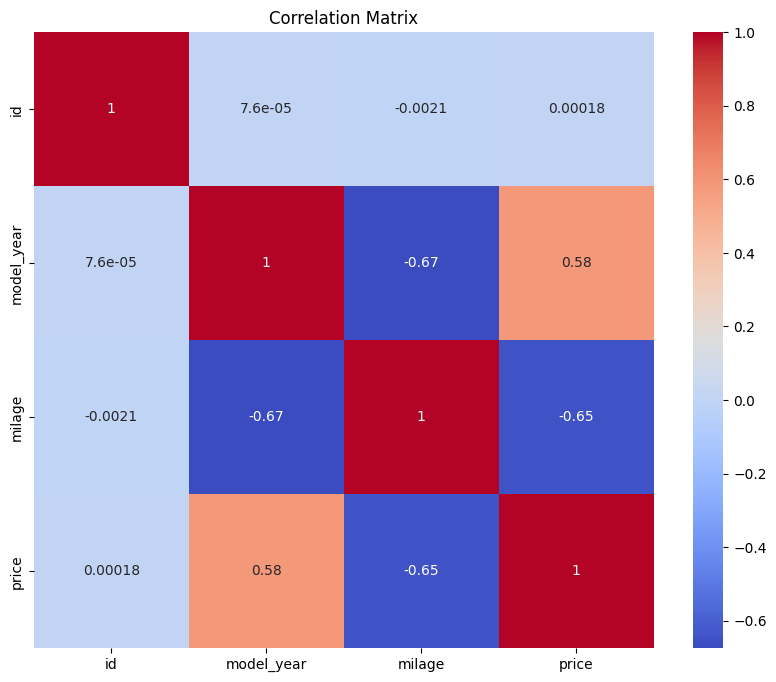

In [ ]:

correlation_matrix = train_data[train_numeric_cols].corr()

print(correlation_matrix['price'].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


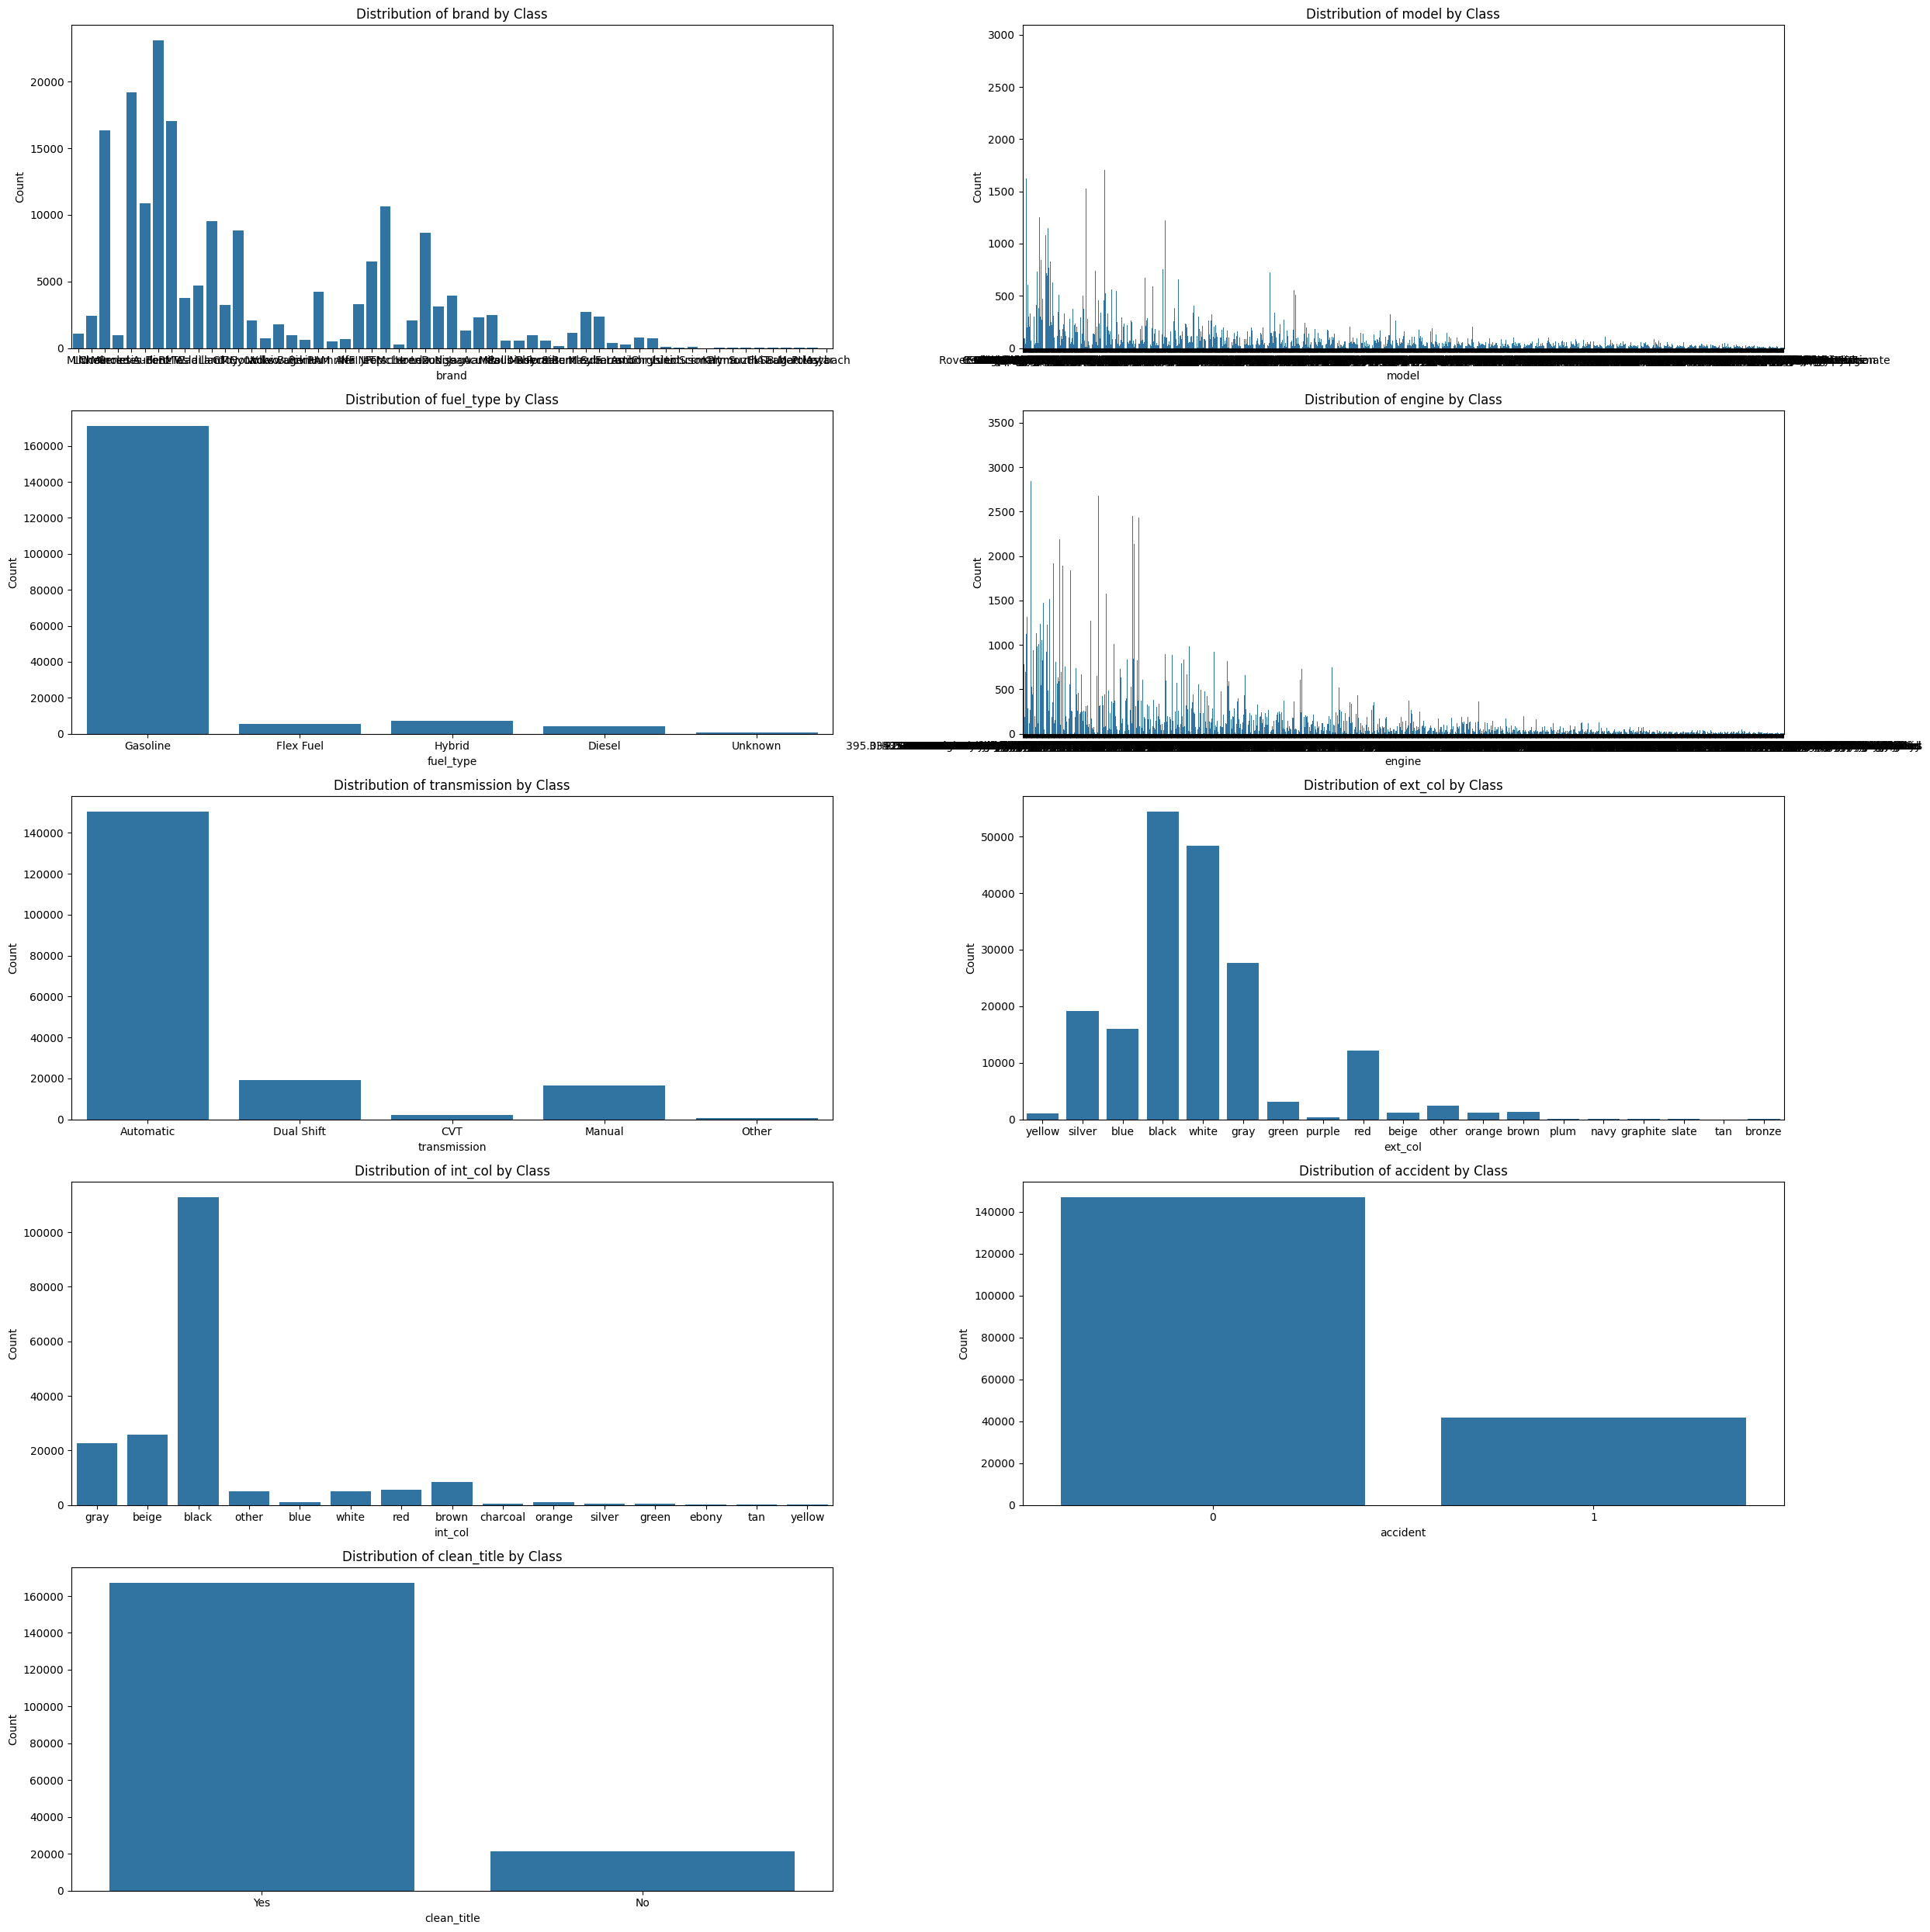

In [ ]:
plt.figure(figsize=(25, 25))

for i, feature in enumerate(train_categorical_cols):
    plt.subplot((len(train_categorical_cols) + 1) // 2, 2, i + 1)
    sns.countplot(data=train_data, x=feature)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
current_year = 2024

train_data['Vehicle_Age'] = current_year - train_data['model_year']

train_data['Vehicle_Age'] = train_data['Vehicle_Age'].replace(0, 1)

train_data['Mileage_per_Year'] = train_data['milage'] / train_data['Vehicle_Age']

train_data['milage_with_age'] = train_data.groupby('Vehicle_Age')['milage'].transform('mean')

train_data['Mileage_per_Year_with_age'] = train_data.groupby('Vehicle_Age')['Mileage_per_Year'].transform('mean')

print(train_data[['Vehicle_Age', 'Mileage_per_Year', 'milage_with_age', 'Mileage_per_Year_with_age']].head())


   Vehicle_Age  Mileage_per_Year  milage_with_age  Mileage_per_Year_with_age
0           17      11901.617647    117496.766304                6911.574488
1           22       6511.363636    116481.483229                5294.612874
2           22       6215.045455    116481.483229                5294.612874
3            7       2785.714286     67825.707207                9689.386744
4            3       2462.666667     29319.961122                9773.320374


In [ ]:
model_price_avg = train_data.groupby('model')['price'].mean()


In [ ]:
current_year = 2024

test_data['Vehicle_Age'] = current_year - test_data['model_year']

test_data['Vehicle_Age'] = test_data['Vehicle_Age'].replace(0, 1)

test_data['Mileage_per_Year'] = test_data['milage'] / test_data['Vehicle_Age']

test_data['milage_with_age'] = test_data.groupby('Vehicle_Age')['milage'].transform('mean')

test_data['Mileage_per_Year_with_age'] = test_data.groupby('Vehicle_Age')['Mileage_per_Year'].transform('mean')

print(test_data[['Vehicle_Age', 'Mileage_per_Year', 'milage_with_age', 'Mileage_per_Year_with_age']].head())


   Vehicle_Age  Mileage_per_Year  milage_with_age  Mileage_per_Year_with_age
0            9      10888.888889     81078.503981                9008.722665
1            4       2285.500000     34258.886442                8564.721611
2            2      14060.500000     17877.043403                8938.521702
3            8       7657.250000     75999.679762                9499.959970
4            6       9833.333333     52105.532436                8684.255406


In [ ]:
model_price_avg.describe()

count     1897.000000
mean     35056.999176
std      17658.141811
min       7683.117647
25%      20503.266667
50%      32375.103448
75%      45999.000000
max      93416.666667
Name: price, dtype: float64

In [ ]:
train_data.head()

id          brand              model  model_year    milage  fuel_type  \
0   0           MINI      Cooper S Base        2007  202327.5   Gasoline   
1   1        Lincoln              LS V8        2002  143250.0   Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731.0  Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500.0   Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388.0   Gasoline   

                                              engine transmission ext_col  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel    Automatic  yellow   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel    Automatic  silver   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...    Automatic    blue   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   Dual Shift   black   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel    Automatic   black   

  int_col  ...  price milage_log  price_log  horsepower  engine_size  \
0    gray  ...   4200  12.269052   8.343078       172.0          1.6   
1   beige  ...   4999  11.872354   8.517193       252.0          3.9   
2    gray  ...  13900  11.825778   9.539716       320.0          5.3   
3   black  ...  45000   9.878221  10.714440       420.0          5.0   
4   beige  ...  97500   8.907748  11.487618       208.0          2.0   

   cylinders  Vehicle_Age  Mileage_per_Year  milage_with_age  \
0        4.0           17      11901.617647    117496.766304   
1        8.0           22       6511.363636    116481.483229   
2        8.0           22       6215.045455    116481.483229   
3        8.0            7       2785.714286     67825.707207   
4        4.0            3       2462.666667     29319.961122   

   Mileage_per_Year_with_age  
0                6911.574488  
1                5294.612874  
2                5294.612874  
3                9689.386744  
4                9773.320374  

[5 rows x 22 columns]

In [ ]:
categorical_columns = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

for col in categorical_columns:
    train_unique = set(train_data[col].unique())
    test_unique = set(test_data[col].unique())

    diff = train_unique - test_unique

    if diff:
        filtered_train_data = train_data[train_data[col].isin(diff)]

        print(f"\nValue counts for '{col}' in train data (but not in test data):")
        print(filtered_train_data[col].value_counts())
    else:
        print(f"\nAll values in '{col}' from train are present in test.")



Value counts for 'brand' in train data (but not in test data):
brand
Polestar    7
smart       3
Name: count, dtype: int64

Value counts for 'model' in train data (but not in test data):
model
i3 Base                         4
Impreza Premium                 4
X5 eDrive xDrive40e             3
Forte LX                        2
V60 T6 R-Design Platinum        2
X5 xDrive 35i Sport Activity    2
X5 3.0i                         1
Name: count, dtype: int64

All values in 'fuel_type' from train are present in test.

All values in 'transmission' from train are present in test.

All values in 'ext_col' from train are present in test.

All values in 'int_col' from train are present in test.

All values in 'accident' from train are present in test.

All values in 'clean_title' from train are present in test.


In [ ]:
# for col in categorical_columns:
#     train_unique = set(train_data[col].unique())
#     test_unique = set(test_data[col].unique())

#     diff = train_unique - test_unique

#     if diff:
#         train_data = train_data[~train_data[col].isin(diff)]

#         print(f"\nRemoved rows from train data where '{col}' has values not present in test data.")
#     else:
#         print(f"\nAll values in '{col}' from train are present in test.")

# print("\nFinal train data shape after removing unmatched values:", train_data.shape)


In [ ]:
low_price_threshold = 24313
high_price_threshold = 41177

def price_range_group(model):
    avg_price = model_price_avg.get(model, None)
    if avg_price is None:
        return 'Unknown'
    elif avg_price <= low_price_threshold:
        return 'Low Price'
    elif avg_price <= high_price_threshold:
        return 'Mid Price'
    else:
        return 'High Price'

train_data['model_grouped_by_price'] = train_data['model'].apply(price_range_group)
test_data['model_grouped_by_price'] = test_data['model'].apply(price_range_group)

# Output the result
print(train_data[['model', 'model_grouped_by_price']].head())
print(test_data[['model', 'model_grouped_by_price']].head())


               model model_grouped_by_price
0      Cooper S Base              Low Price
1              LS V8              Low Price
2  Silverado 2500 LT              Low Price
3   G90 5.0 Ultimate             High Price
4        Metris Base             High Price
                  model model_grouped_by_price
0        Rover LR2 Base              Low Price
1     Rover Defender SE             High Price
2    Expedition Limited             High Price
3         A6 2.0T Sport              Mid Price
4  A6 2.0T Premium Plus              Mid Price


In [ ]:
print(test_data[['model', 'model_grouped_by_price']].head())


                  model model_grouped_by_price
0        Rover LR2 Base              Low Price
1     Rover Defender SE             High Price
2    Expedition Limited             High Price
3         A6 2.0T Sport              Mid Price
4  A6 2.0T Premium Plus              Mid Price


In [ ]:

train_data['model_grouped_by_age'] = pd.cut(train_data['Vehicle_Age'], bins=[0, 3, 10, np.inf], labels=['New', 'Mid', 'Old'])
test_data['model_grouped_by_age'] = pd.cut(test_data['Vehicle_Age'], bins=[0, 3, 10, np.inf], labels=['New', 'Mid', 'Old'])

print(train_data[['model', 'model_grouped_by_age']].head())


               model model_grouped_by_age
0      Cooper S Base                  Old
1              LS V8                  Old
2  Silverado 2500 LT                  Old
3   G90 5.0 Ultimate                  Mid
4        Metris Base                  New


In [ ]:
brand_threshold = 500

brand_counts = train_data['brand'].value_counts()
train_data['brand_grouped'] = train_data['brand'].apply(lambda x: x if brand_counts[x] >= brand_threshold else 'Other')
test_data['brand_grouped'] = test_data['brand'].apply(lambda x: x if brand_counts.get(x, 0) >= brand_threshold else 'Other')

model_threshold = 500

model_counts = train_data['model'].value_counts()
train_data['model_grouped'] = train_data['model'].apply(lambda x: x if model_counts[x] >= model_threshold else 'Other')
test_data['model_grouped'] = test_data['model'].apply(lambda x: x if model_counts.get(x, 0) >= model_threshold else 'Other')

print(train_data[['brand', 'brand_grouped']].head())
print(test_data[['model', 'model_grouped']].head())


           brand  brand_grouped
0           MINI           MINI
1        Lincoln        Lincoln
2      Chevrolet      Chevrolet
3        Genesis        Genesis
4  Mercedes-Benz  Mercedes-Benz
                  model       model_grouped
0        Rover LR2 Base               Other
1     Rover Defender SE               Other
2    Expedition Limited  Expedition Limited
3         A6 2.0T Sport               Other
4  A6 2.0T Premium Plus               Other


In [ ]:
train_data['model_grouped'].nunique()

62

In [ ]:
test_data['model_grouped'].nunique()

62

In [ ]:
luxury_brands = [
    'Mercedes-Benz', 'BMW', 'Audi', 'Porsche', 'Lexus', 'Cadillac',
    'INFINITI', 'Jaguar', 'Volvo', 'Ferrari', 'Maserati', 'Lamborghini',
    'Bentley', 'Rolls-Royce', 'Aston', 'McLaren', 'Bugatti', 'Maybach'
]

train_data['luxury_status'] = train_data['brand'].apply(lambda x: 'Luxury' if x in luxury_brands else 'Not Luxury')
test_data['luxury_status'] = test_data['brand'].apply(lambda x: 'Luxury' if x in luxury_brands else 'Not Luxury')

luxury_counts = train_data['luxury_status'].value_counts()

print(luxury_counts)

print(train_data[['brand', 'luxury_status']])


luxury_status
Not Luxury    107885
Luxury         80648
Name: count, dtype: int64
                brand luxury_status
0                MINI    Not Luxury
1             Lincoln    Not Luxury
2           Chevrolet    Not Luxury
3             Genesis    Not Luxury
4       Mercedes-Benz        Luxury
...               ...           ...
188528       Cadillac        Luxury
188529  Mercedes-Benz        Luxury
188530  Mercedes-Benz        Luxury
188531           Audi        Luxury
188532        Porsche        Luxury

[188533 rows x 2 columns]


In [ ]:
train_data.head()

id          brand              model  model_year    milage  fuel_type  \
0   0           MINI      Cooper S Base        2007  202327.5   Gasoline   
1   1        Lincoln              LS V8        2002  143250.0   Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731.0  Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500.0   Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388.0   Gasoline   

                                              engine transmission ext_col  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel    Automatic  yellow   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel    Automatic  silver   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...    Automatic    blue   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   Dual Shift   black   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel    Automatic   black   

  int_col  ...  cylinders Vehicle_Age  Mileage_per_Year  milage_with_age  \
0    gray  ...        4.0          17      11901.617647    117496.766304   
1   beige  ...        8.0          22       6511.363636    116481.483229   
2    gray  ...        8.0          22       6215.045455    116481.483229   
3   black  ...        8.0           7       2785.714286     67825.707207   
4   beige  ...        4.0           3       2462.666667     29319.961122   

   Mileage_per_Year_with_age  model_grouped_by_price  model_grouped_by_age  \
0                6911.574488               Low Price                   Old   
1                5294.612874               Low Price                   Old   
2                5294.612874               Low Price                   Old   
3                9689.386744              High Price                   Mid   
4                9773.320374              High Price                   New   

   brand_grouped  model_grouped  luxury_status  
0           MINI  Cooper S Base     Not Luxury  
1        Lincoln          Other     Not Luxury  
2      Chevrolet          Other     Not Luxury  
3        Genesis          Other     Not Luxury  
4  Mercedes-Benz    Metris Base         Luxury  

[5 rows x 27 columns]

In [ ]:
train_data.isnull().sum()

id                           0
brand                        0
model                        0
model_year                   0
milage                       0
fuel_type                    0
engine                       0
transmission                 0
ext_col                      0
int_col                      0
accident                     0
clean_title                  0
price                        0
milage_log                   0
price_log                    0
horsepower                   0
engine_size                  0
cylinders                    0
Vehicle_Age                  0
Mileage_per_Year             0
milage_with_age              0
Mileage_per_Year_with_age    0
model_grouped_by_price       0
model_grouped_by_age         0
brand_grouped                0
model_grouped                0
luxury_status                0
dtype: int64

In [ ]:
train_data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'milage_log', 'price_log', 'horsepower', 'engine_size',
       'cylinders', 'Vehicle_Age', 'Mileage_per_Year', 'milage_with_age',
       'Mileage_per_Year_with_age', 'model_grouped_by_price',
       'model_grouped_by_age', 'brand_grouped', 'model_grouped',
       'luxury_status'],
      dtype='object')

In [ ]:
test_data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'milage_log', 'horsepower', 'engine_size', 'cylinders', 'Vehicle_Age',
       'Mileage_per_Year', 'milage_with_age', 'Mileage_per_Year_with_age',
       'model_grouped_by_price', 'model_grouped_by_age', 'brand_grouped',
       'model_grouped', 'luxury_status'],
      dtype='object')

In [ ]:
train_data.head()

id          brand              model  model_year    milage  fuel_type  \
0   0           MINI      Cooper S Base        2007  202327.5   Gasoline   
1   1        Lincoln              LS V8        2002  143250.0   Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731.0  Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500.0   Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388.0   Gasoline   

                                              engine transmission ext_col  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel    Automatic  yellow   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel    Automatic  silver   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...    Automatic    blue   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   Dual Shift   black   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel    Automatic   black   

  int_col  ...  cylinders Vehicle_Age  Mileage_per_Year  milage_with_age  \
0    gray  ...        4.0          17      11901.617647    117496.766304   
1   beige  ...        8.0          22       6511.363636    116481.483229   
2    gray  ...        8.0          22       6215.045455    116481.483229   
3   black  ...        8.0           7       2785.714286     67825.707207   
4   beige  ...        4.0           3       2462.666667     29319.961122   

   Mileage_per_Year_with_age  model_grouped_by_price  model_grouped_by_age  \
0                6911.574488               Low Price                   Old   
1                5294.612874               Low Price                   Old   
2                5294.612874               Low Price                   Old   
3                9689.386744              High Price                   Mid   
4                9773.320374              High Price                   New   

   brand_grouped  model_grouped  luxury_status  
0           MINI  Cooper S Base     Not Luxury  
1        Lincoln          Other     Not Luxury  
2      Chevrolet          Other     Not Luxury  
3        Genesis          Other     Not Luxury  
4  Mercedes-Benz    Metris Base         Luxury  

[5 rows x 27 columns]

In [ ]:
data = train_data.copy()
test_df = test_data.copy()

In [ ]:
data = data.drop(['id','brand','model','milage','engine'], axis=1)

In [ ]:
test_df = test_df.drop(['id','brand','model','milage','engine'], axis=1)

In [ ]:
test_df.columns

Index(['model_year', 'fuel_type', 'transmission', 'ext_col', 'int_col',
       'accident', 'clean_title', 'milage_log', 'horsepower', 'engine_size',
       'cylinders', 'Vehicle_Age', 'Mileage_per_Year', 'milage_with_age',
       'Mileage_per_Year_with_age', 'model_grouped_by_price',
       'model_grouped_by_age', 'brand_grouped', 'model_grouped',
       'luxury_status'],
      dtype='object')

In [ ]:
data.columns

Index(['model_year', 'fuel_type', 'transmission', 'ext_col', 'int_col',
       'accident', 'clean_title', 'price', 'milage_log', 'price_log',
       'horsepower', 'engine_size', 'cylinders', 'Vehicle_Age',
       'Mileage_per_Year', 'milage_with_age', 'Mileage_per_Year_with_age',
       'model_grouped_by_price', 'model_grouped_by_age', 'brand_grouped',
       'model_grouped', 'luxury_status'],
      dtype='object')

In [ ]:
# data = data.drop(['model_pca_1','model_pca_2','model_pca_3','model_pca_4','model_pca_5','luxury_status'], axis=1)

In [ ]:
# data = data.drop(['model_pca_1','model_pca_2','model_pca_3','model_pca_4','model_pca_5','luxury_status'], axis=1)

In [ ]:
data.head()

model_year  fuel_type transmission ext_col int_col  accident clean_title  \
0        2007   Gasoline    Automatic  yellow    gray         0         Yes   
1        2002   Gasoline    Automatic  silver   beige         1         Yes   
2        2002  Flex Fuel    Automatic    blue    gray         0         Yes   
3        2017   Gasoline   Dual Shift   black   black         0         Yes   
4        2021   Gasoline    Automatic   black   beige         0         Yes   

   price  milage_log  price_log  ...  cylinders  Vehicle_Age  \
0   4200   12.269052   8.343078  ...        4.0           17   
1   4999   11.872354   8.517193  ...        8.0           22   
2  13900   11.825778   9.539716  ...        8.0           22   
3  45000    9.878221  10.714440  ...        8.0            7   
4  97500    8.907748  11.487618  ...        4.0            3   

   Mileage_per_Year  milage_with_age  Mileage_per_Year_with_age  \
0      11901.617647    117496.766304                6911.574488   
1       6511.363636    116481.483229                5294.612874   
2       6215.045455    116481.483229                5294.612874   
3       2785.714286     67825.707207                9689.386744   
4       2462.666667     29319.961122                9773.320374   

   model_grouped_by_price  model_grouped_by_age  brand_grouped  model_grouped  \
0               Low Price                   Old           MINI  Cooper S Base   
1               Low Price                   Old        Lincoln          Other   
2               Low Price                   Old      Chevrolet          Other   
3              High Price                   Mid        Genesis          Other   
4              High Price                   New  Mercedes-Benz    Metris Base   

  luxury_status  
0    Not Luxury  
1    Not Luxury  
2    Not Luxury  
3    Not Luxury  
4        Luxury  

[5 rows x 22 columns]

In [ ]:

data_numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_categorical_cols = data.select_dtypes(include=['object']).columns

print(data_numeric_cols)
print(data_categorical_cols)

Index(['model_year', 'accident', 'price', 'milage_log', 'price_log',
       'horsepower', 'engine_size', 'cylinders', 'Vehicle_Age',
       'Mileage_per_Year', 'milage_with_age', 'Mileage_per_Year_with_age'],
      dtype='object')
Index(['fuel_type', 'transmission', 'ext_col', 'int_col', 'clean_title',
       'model_grouped_by_price', 'brand_grouped', 'model_grouped',
       'luxury_status'],
      dtype='object')


<Axes: >

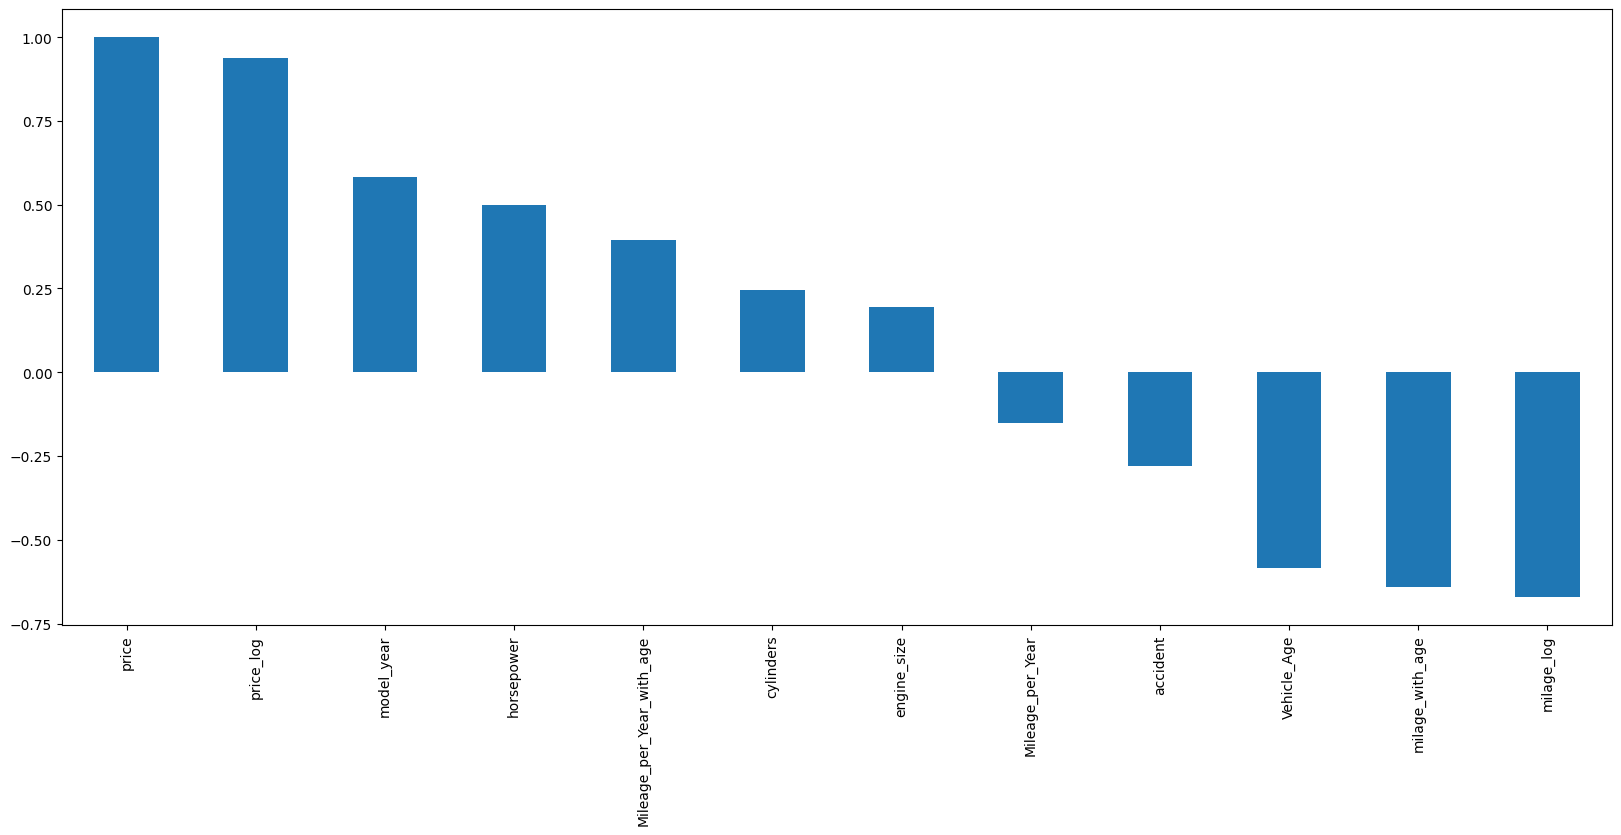

In [ ]:
plt.figure(figsize=(20,8))
data[data_numeric_cols].corr()['price'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

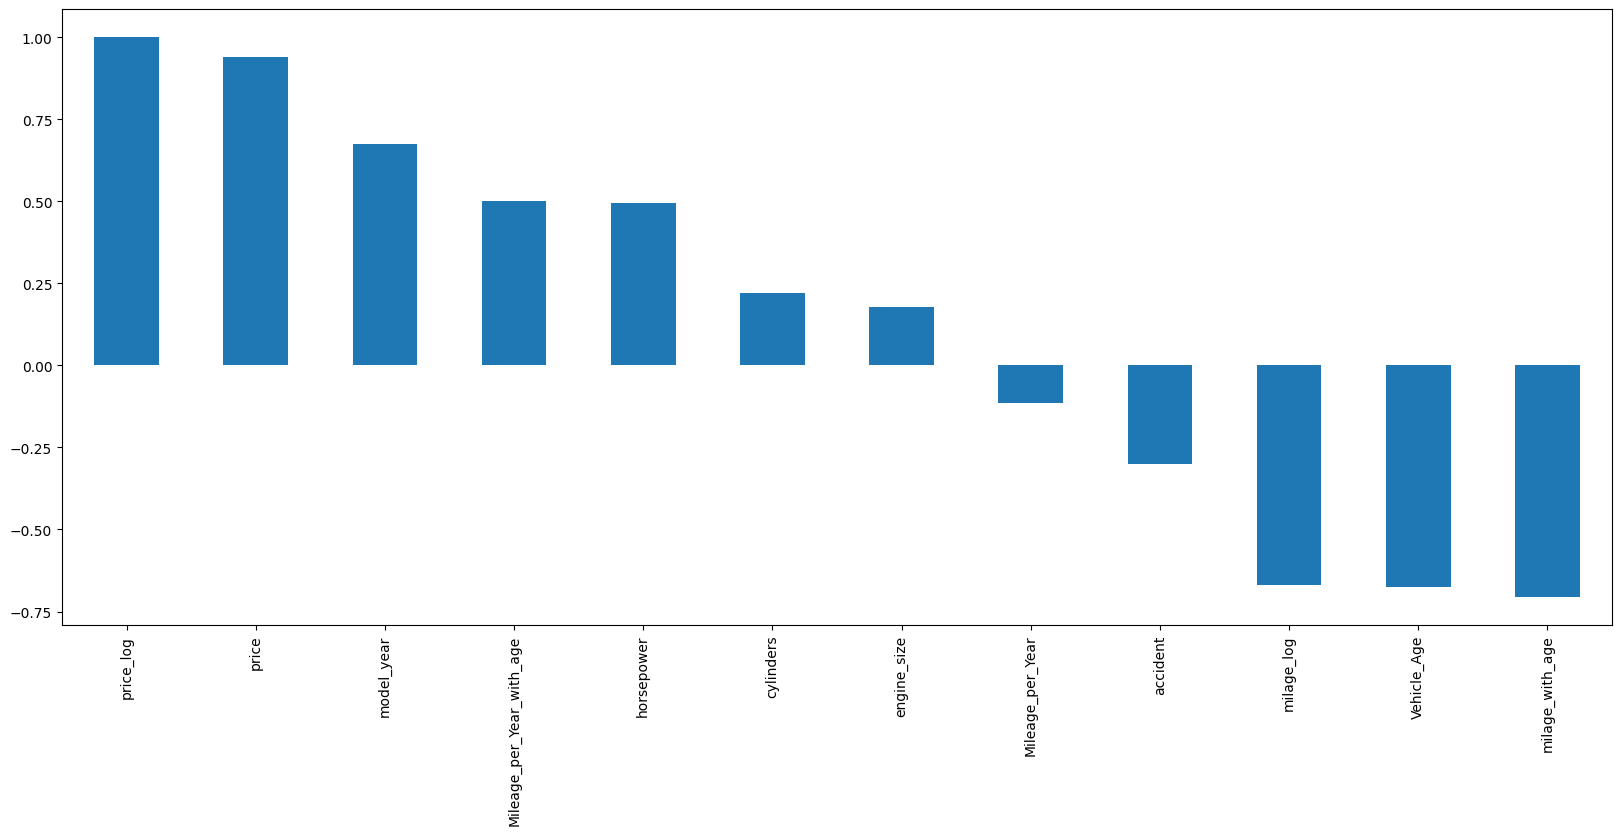

In [ ]:
plt.figure(figsize=(20,8))
data[data_numeric_cols].corr()['price_log'].sort_values(ascending=False).plot(kind='bar')

In [ ]:
data = data.drop(['milage_log','Vehicle_Age','milage_with_age'], axis=1)

In [ ]:
test_df = test_df.drop(['milage_log','Vehicle_Age','milage_with_age'], axis=1)

In [ ]:

data_numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_categorical_cols = data.select_dtypes(include=['object']).columns

print(data_numeric_cols)
print(data_categorical_cols)

Index(['model_year', 'accident', 'price', 'price_log', 'horsepower',
       'engine_size', 'cylinders', 'Mileage_per_Year',
       'Mileage_per_Year_with_age'],
      dtype='object')
Index(['fuel_type', 'transmission', 'ext_col', 'int_col', 'clean_title',
       'model_grouped_by_price', 'brand_grouped', 'model_grouped',
       'luxury_status'],
      dtype='object')


In [ ]:

test_numeric_cols = test_df.select_dtypes(include=['float64', 'int64']).columns
test_categorical_cols = test_df.select_dtypes(include=['object']).columns

print(test_numeric_cols)
print(test_categorical_cols)

Index(['model_year', 'accident', 'horsepower', 'engine_size', 'cylinders',
       'Mileage_per_Year', 'Mileage_per_Year_with_age'],
      dtype='object')
Index(['fuel_type', 'transmission', 'ext_col', 'int_col', 'clean_title',
       'model_grouped_by_price', 'brand_grouped', 'model_grouped',
       'luxury_status'],
      dtype='object')


In [ ]:
test_df.head()

model_year fuel_type transmission ext_col int_col  accident clean_title  \
0        2015  Gasoline    Automatic   white   beige         0         Yes   
1        2020    Hybrid    Automatic  silver   black         0         Yes   
2        2022  Gasoline    Automatic   white   brown         0          No   
3        2016  Gasoline    Automatic  yellow   black         0          No   
4        2018  Gasoline    Automatic    gray   black         0         Yes   

   horsepower  engine_size  cylinders  Mileage_per_Year  \
0  240.000000     2.000000   4.000000      10888.888889   
1  395.000000     3.000000   6.000000       2285.500000   
2  304.600000     3.500000   6.000000      14060.500000   
3  343.263856     3.806676   6.374268       7657.250000   
4  252.000000     2.000000   4.000000       9833.333333   

   Mileage_per_Year_with_age model_grouped_by_price model_grouped_by_age  \
0                9008.722665              Low Price                  Mid   
1                8564.721611             High Price                  Mid   
2                8938.521702             High Price                  New   
3                9499.959970              Mid Price                  Mid   
4                8684.255406              Mid Price                  Mid   

  brand_grouped       model_grouped luxury_status  
0          Land               Other    Not Luxury  
1          Land               Other    Not Luxury  
2          Ford  Expedition Limited    Not Luxury  
3          Audi               Other        Luxury  
4          Audi               Other        Luxury

In [ ]:
data_numeric_cols = ['model_year', 'accident', 'horsepower', 'engine_size', 'cylinders',
       'Mileage_per_Year', 'Mileage_per_Year_with_age']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[data_numeric_cols] = scaler.fit_transform(data[data_numeric_cols])
test_df[data_numeric_cols] = scaler.transform(test_df[data_numeric_cols])

In [ ]:
data.head()

model_year  fuel_type transmission ext_col int_col  accident clean_title  \
0   -1.559808   Gasoline    Automatic  yellow    gray -0.531822         Yes   
1   -2.443052   Gasoline    Automatic  silver   beige  1.880330         Yes   
2   -2.443052  Flex Fuel    Automatic    blue    gray -0.531822         Yes   
3    0.206679   Gasoline   Dual Shift   black   black -0.531822         Yes   
4    0.913274   Gasoline    Automatic   black   beige -0.531822         Yes   

   price  price_log  horsepower  engine_size  cylinders  Mileage_per_Year  \
0   4200   8.343078   -1.541479    -1.675847  -1.541243          0.521145   
1   4999   8.517193   -0.807914     0.059867   1.071217         -0.348921   
2  13900   9.539716   -0.184383     1.116388   1.071217         -0.396751   
3  45000  10.714440    0.732574     0.889991   1.071217         -0.950295   
4  97500  11.487618   -1.211375    -1.373984  -1.541243         -1.002440   

   Mileage_per_Year_with_age model_grouped_by_price model_grouped_by_age  \
0                  -1.559773              Low Price                  Old   
1                  -2.991614              Low Price                  Old   
2                  -2.991614              Low Price                  Old   
3                   0.900017             High Price                  Mid   
4                   0.974341             High Price                  New   

   brand_grouped  model_grouped luxury_status  
0           MINI  Cooper S Base    Not Luxury  
1        Lincoln          Other    Not Luxury  
2      Chevrolet          Other    Not Luxury  
3        Genesis          Other    Not Luxury  
4  Mercedes-Benz    Metris Base        Luxury

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in data_categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


for col in data_categorical_cols:
    le = label_encoders[col]

    unseen_categories = set(test_df[col]) - set(le.classes_)

    if unseen_categories:
        print(f"Unseen categories in column {col}: {unseen_categories}")

        test_df[col] = test_df[col].apply(lambda x: x if x in le.classes_ else 'Unknown')

        if 'Unknown' not in le.classes_:
            le.classes_ = np.append(le.classes_, 'Unknown')

    test_df[col] = le.transform(test_df[col])


Unseen categories in column model_grouped_by_price: {'Unknown'}


In [ ]:
le1 = LabelEncoder()
data['model_grouped_by_age'] = le1.fit_transform(data['model_grouped_by_age'])
test_df['model_grouped_by_age'] = le1.transform(test_df['model_grouped_by_age'])

In [ ]:
data.head()

model_year  fuel_type  transmission  ext_col  int_col  accident  \
0   -1.559808          2             0       18        6 -0.531822   
1   -2.443052          2             0       14        0  1.880330   
2   -2.443052          1             0        2        6 -0.531822   
3    0.206679          2             2        1        1 -0.531822   
4    0.913274          2             0        1        0 -0.531822   

   clean_title  price  price_log  horsepower  engine_size  cylinders  \
0            1   4200   8.343078   -1.541479    -1.675847  -1.541243   
1            1   4999   8.517193   -0.807914     0.059867   1.071217   
2            1  13900   9.539716   -0.184383     1.116388   1.071217   
3            1  45000  10.714440    0.732574     0.889991   1.071217   
4            1  97500  11.487618   -1.211375    -1.373984  -1.541243   

   Mileage_per_Year  Mileage_per_Year_with_age  model_grouped_by_price  \
0          0.521145                  -1.559773                       1   
1         -0.348921                  -2.991614                       1   
2         -0.396751                  -2.991614                       1   
3         -0.950295                   0.900017                       0   
4         -1.002440                   0.974341                       0   

   model_grouped_by_age  brand_grouped  model_grouped  luxury_status  
0                     2             24             15              1  
1                     2             23             46              1  
2                     2              7             46              1  
3                     0             12             46              1  
4                     1             27             43              0

In [ ]:
X = data.drop(['price','price_log'], axis=1)
y = data['price_log']
Y = data['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3535/3535 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.9452 - mae: 0.8107 - val_loss: 0.3496 - val_mae: 0.4473
Epoch 2/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3491 - mae: 0.4465 - val_loss: 0.3107 - val_mae: 0.4259
Epoch 3/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.2933 - mae: 0.4064 - val_loss: 0.2788 - val_mae: 0.3909
Epoch 4/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.2712 - mae: 0.3885 - val_loss: 0.2735 - val_mae: 0.3949
Epoch 5/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.2677 - mae: 0.3840 - val_loss: 0.2476 - val_mae: 0.3637
Epoch 6/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.2582 - mae: 0.3753 - val_loss: 0.2519 - val_mae: 0.3743
Epoch 7/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2536 - mae: 0.3715 - val_loss: 0.2638 - val_mae: 0.3872
Epoch 8/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.2513 - mae: 0.3684 - val_loss: 0.2464 - val_mae: 0.3594
Epoch 9/100
3535/3535 ━━━━━━━━━━━━━━━━━━━

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {test_mae}")
# 0.42410731315612793

1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2317 - mae: 0.3478
Test Mean Absolute Error: 0.3476782441139221


In [ ]:
y_pred = model.predict(X_test)

1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
# 0.5846283481270901


Root Mean Squared Error (RMSE): 0.4808289646781032


In [ ]:
ypre = model.predict(X_test)

1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
data = {
    'Actual Values': y_test,
    'Predicted Values': ypre.flatten()
}
df = pd.DataFrame(data)
print(df)

        Actual Values  Predicted Values
111355      10.545341         10.647174
182258      10.308986          9.779963
14147       10.195149         10.263604
79313       10.126631         10.009198
101160      10.778873         10.404866
...               ...               ...
111642       8.810012          9.249474
12371       10.611523         11.001359
83077        9.952278          9.521495
82880        9.998843         10.534198
93141       12.432950         10.907582

[47134 rows x 2 columns]


predict test data

In [ ]:
predict_testdata = model.predict(test_df)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


In [ ]:
price_pred_original = np.expm1(predict_testdata)


In [ ]:
price_pred_original

array([[15784.187],
       [56571.72 ],
       [48598.17 ],
       ...,
       [17048.18 ],
       [12525.984],
       [33228.707]], dtype=float32)

In [ ]:
submission_ANN = pd.DataFrame({
    'id': test_data['id'],
    'price': price_pred_original.ravel()
})
submission_ANN.to_csv('submission_ANN.csv', index=False)

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
# Cross-validation scores: [0.67397312 0.66766286 0.67149888 0.66634077 0.66639433]



Cross-validation scores: [0.6689468  0.66058197 0.6676785  0.67484701 0.67111694]


In [ ]:
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))
# 0.6965629023093094
# 0.6711390930730012

0.6949317611779049
0.6666428530577604


In [ ]:
ypred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, ypred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
#  0.5742667358507262

Root Mean Squared Error (RMSE): 0.4759152342685791


In [ ]:
data = {
    'Actual Values': y_test,
    'Predicted Values': ypred.flatten()
}
df = pd.DataFrame(data)
print(df)

        Actual Values  Predicted Values
111355      10.545341         10.722554
182258      10.308986          9.836920
14147       10.195149         10.332129
79313       10.126631          9.974763
101160      10.778873         10.409565
...               ...               ...
111642       8.810012          9.100643
12371       10.611523         10.827234
83077        9.952278          9.686569
82880        9.998843         10.542629
93141       12.432950         11.166615

[47134 rows x 2 columns]


In [ ]:
predict_testdata = rf_model.predict(test_df)

In [ ]:
price_pred_original = np.expm1(predict_testdata)


In [ ]:
submission_randomForest = pd.DataFrame({
    'id': test_data['id'],
    'price': price_pred_original.ravel()
})
submission_randomForest.to_csv('submission_randomForest.csv', index=False)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
classifier = Sequential()

classifier.add(Dense(units=11, activation='relu', input_shape=(X_train.shape[1],)))  # First hidden layer
classifier.add(Dropout(0.3))  # Dropout layer to reduce overfitting
classifier.add(Dense(units=7, activation='relu'))  # Second hidden layer
classifier.add(Dropout(0.3))  # Another Dropout layer
classifier.add(Dense(units=6, activation='relu'))  # Third hidden layer
classifier.add(Dense(units=1))  # Output layer (no activation for regression)

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

model_history = classifier.fit(
    X_train,
    y_train,
    validation_split=0.33,
    batch_size=10,
    epochs=1000,
    callbacks=[early_stopping]
)

test_loss, test_mae = classifier.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9474/9474 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 4.3613 - mean_absolute_error: 1.0277 - val_loss: 0.3756 - val_mean_absolute_error: 0.4730
Epoch 2/1000
9474/9474 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.4078 - mean_absolute_error: 0.4847 - val_loss: 0.4110 - val_mean_absolute_error: 0.5189
Epoch 3/1000
9474/9474 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.4057 - mean_absolute_error: 0.4826 - val_loss: 0.3293 - val_mean_absolute_error: 0.4259
Epoch 4/1000
9474/9474 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - loss: 0.4052 - mean_absolute_error: 0.4833 - val_loss: 0.3515 - val_mean_absolute_error: 0.4445
Epoch 5/1000
9474/9474 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - loss: 0.4058 - mean_absolute_error: 0.4841 - val_loss: 0.2888 - val_mean_absolute_error: 0.3947
Epoch 6/1000
9474/9474 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.4039 - mean_absolute_error: 0.4806 - val_loss: 0.3079 - val_mean_absolute_error: 0.4243
Epoch 7/1000
9474/9474 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.4020 - mean_abso

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = classifier.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse}")
# 0.6561244317826073


1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Root Mean Squared Error (RMSE): 0.5391707624775205


In [ ]:
data = {
    'Actual Values': y_test,
    'Predicted Values': y_pred.flatten()
}
df = pd.DataFrame(data)
print(df)

        Actual Values  Predicted Values
111355      10.545341         10.698578
182258      10.308986          9.540308
14147       10.195149         10.366955
79313       10.126631         10.179285
101160      10.778873         10.592996
...               ...               ...
111642       8.810012          9.540308
12371       10.611523         10.698318
83077        9.952278          9.540308
82880        9.998843          9.540743
93141       12.432950         10.886053

[47134 rows x 2 columns]


In [ ]:
loss, accuracy = classifier.evaluate(X_test, y_test)


1473/1473 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2938 - mean_absolute_error: 0.3979


In [ ]:
predict_testdata = classifier.predict(test_df)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [ ]:
price_pred_original = np.expm1(predict_testdata)


In [ ]:
submission_ANN_new = pd.DataFrame({
    'id': test_data['id'],
    'price': price_pred_original.ravel()
})
submission_ANN_new.to_csv('submission_ANN_new.csv', index=False)

**LSTM**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Reshape your input data for LSTM
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))  # (samples, time steps, features)
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
lstm_model = Sequential()

# First LSTM layer with Dropout and Batch Normalization
lstm_model.add(LSTM(units=128, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
lstm_model.add(Dropout(0.3))
lstm_model.add(BatchNormalization())

# Second LSTM layer with Dropout and Batch Normalization
lstm_model.add(LSTM(units=64, activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.3))
lstm_model.add(BatchNormalization())

# Third LSTM layer with Dropout
lstm_model.add(LSTM(units=32, activation='relu'))
lstm_model.add(Dropout(0.3))

# Fully connected layer
lstm_model.add(Dense(units=16, activation='relu'))
lstm_model.add(Dense(units=1, activation='linear'))

# Compile the lstm_model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# Fit the model
history = lstm_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - loss: 12.1610 - mae: 2.2720 - val_loss: 3.7464 - val_mae: 1.8006
Epoch 2/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.5918 - mae: 0.5879 - val_loss: 1.6396 - val_mae: 1.1213
Epoch 3/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.3544 - mae: 0.4508 - val_loss: 0.8159 - val_mae: 0.7397
Epoch 4/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - loss: 0.3048 - mae: 0.4154 - val_loss: 0.6088 - val_mae: 0.6320
Epoch 5/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - loss: 0.2929 - mae: 0.4066 - val_loss: 0.5096 - val_mae: 0.5440
Epoch 6/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - loss: 0.2870 - mae: 0.4007 - val_loss: 0.5286 - val_mae: 0.5788
Epoch 7/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - loss: 0.2806 - mae: 0.3939 - val_loss: 0.8237 - val_mae: 0.5423
Epoch 8/100
3535/3535 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - loss: 0.2710 - mae: 0.3863 - val_loss: 0.4614 - val_mae: 0.5266
Epoch 9/100
3535/3535 ━

In [ ]:
# Evaluate the lstm_model
test_loss, test_mae = lstm_model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')




1473/1473 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2743 - mae: 0.3799
Test Loss: 0.2864502966403961, Test MAE: 0.37954220175743103


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = lstm_model.predict(X_test_reshaped)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse}")


1473/1473 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Root Mean Squared Error (RMSE): 0.5352106962465266


In [ ]:
# Make predictions
ypre = lstm_model.predict(X_test_reshaped)

# Prepare the DataFrame for comparison
data = {
    'Actual Values': y_test,
    'Predicted Values': ypre.flatten()
}
df = pd.DataFrame(data)
print(df)

# Test Loss: 0.36885738372802734, Test MAE: 0.4423657953739166

1473/1473 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
        Actual Values  Predicted Values
111355      10.545341         10.528977
182258      10.308986          9.901977
14147       10.195149         10.335772
79313       10.126631         10.042654
101160      10.778873         10.399575
...               ...               ...
111642       8.810012          9.334777
12371       10.611523         10.688031
83077        9.952278          9.858241
82880        9.998843         10.366420
93141       12.432950         10.677028

[47134 rows x 2 columns]


In [ ]:
data = {
    'Actual Values': np.expm1(y_test),
    'Predicted Values': np.expm1(ypre.flatten())
}
df = pd.DataFrame(data)
print(df)



        Actual Values  Predicted Values
111355   37999.000000      37382.226562
182258   30000.000000      19968.802734
14147    26772.000000      30814.453125
79313    24999.000000      22985.308594
101160   47995.000000      32844.671875
...               ...               ...
111642    6700.000000      11324.101562
12371    40599.000000      43827.132812
83077    20999.000000      19114.238281
82880    22000.000000      31773.513672
93141   250934.104479      43347.515625

[47134 rows x 2 columns]


In [ ]:
X_test_df_reshaped = np.reshape(test_df, (test_df.shape[0], 1, test_df.shape[1]))


In [ ]:
predict_testdata = lstm_model.predict(X_test_df_reshaped)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step


In [ ]:
price_pred_original = np.expm1(predict_testdata)


In [ ]:
submission_LSTM = pd.DataFrame({
    'id': test_data['id'],
    'price': price_pred_original.ravel()
})
submission_LSTM.to_csv('submission_LSTM.csv', index=False)